In [1]:
import pandas as pd
import numpy as np

#### 심장마비 환자 예측
> Age : 나이
> 
> Sex: 성별
> 
> ChestPainType : 흉통 타입
> 
> RestingBP : 휴식시 혈압
> 
> Cholesterol : 콜레스테롤
> 
> FastingBS : 빠른 혈압 환자
> 
> RestingECG : 휴식 시 혈압 심전도 타입
> 
> MaxHR : 최대 심박수
> 
> ExerciseAngina : 협심증
> 
> Oldpeak : 운동 시 심전도 기울기
> 
> ST_Slope : 운동으로 인한 심박수 증가율 기울기
> 
> HeartDisease : 심장질환 유무

#### 📌 방향성 
> 독립변수들의 타겟 데이터에 대한 중요도 비중을 분석 한 다음에, 독립변수와의 상관관계성이 있거나 (즉 correlation을 활용한 히트맵에서 가중치가 0을 넘어서는 것) 분포가 좋지 못한 독립변수이면
>
> 삭제처리 대상으로 두고, 최고 성능을 가진 분류 모델 훈련 후 그 importance와 correaltion을 각각 비교하여 삭제 처리 하기로 하였습니다.


#### 전처리 단계 
- 결측치 or 중복치 제거
- 일반화 작업 
- 이상치 제거

In [2]:
df = pd.read_csv('./datasets/heartFailure.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info() # 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.duplicated().sum() # 중복된 행도 없음 

0

In [5]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

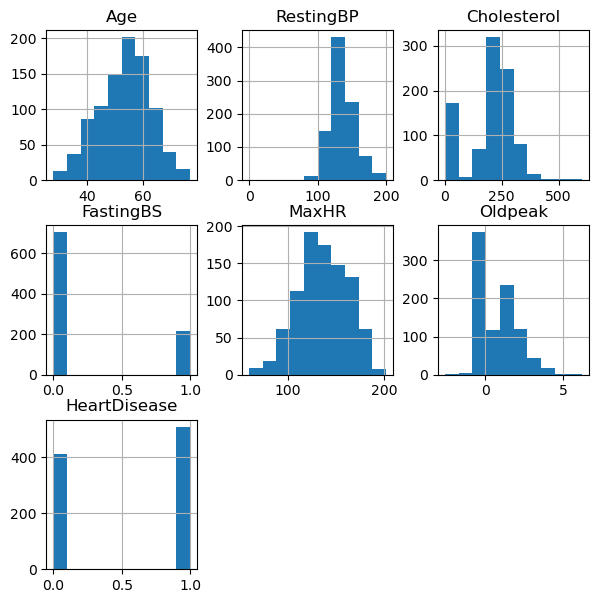

In [6]:
df.hist(figsize=(7,7))

<Axes: >

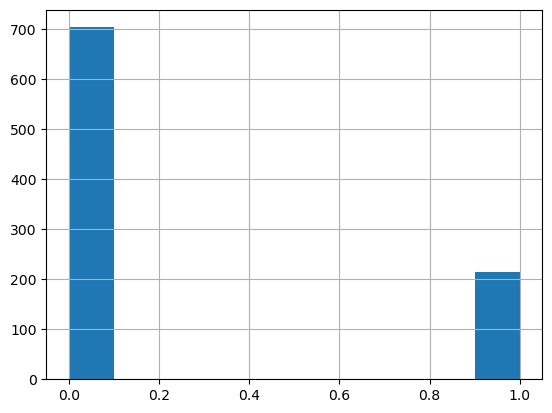

In [7]:
df['FastingBS'].hist()

In [8]:
df['FastingBS'].value_counts() 
# 0에 매우 많은 분포수치를 보이기 때문에, 우선 correation으로 타겟에 대한 비중을 확인 한 뒤 검토해보겠습니다.

FastingBS
0    704
1    214
Name: count, dtype: int64

<Axes: >

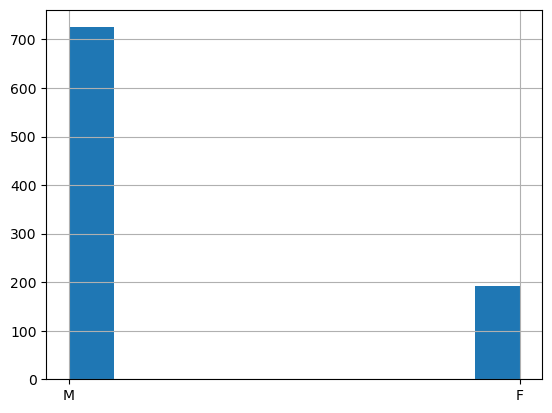

In [9]:
df['Sex'].hist()
# 성별 같은 경우도 마찬가지로 correaltion으로 비중 확인 한 뒤 검토 

In [10]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [11]:
# 수치형 데이터들의 이상치 제거 하기 전 우선 각 데이터 프레임에 분리 
chol_df = df.loc[:,'Cholesterol'].reset_index()
max_df = df.loc[:,'MaxHR'].reset_index()
rb_df = df.loc[:,'RestingBP'].reset_index()

display(chol_df)
display(max_df)
display(rb_df)

,index,Cholesterol
0,0,289
1,1,180
2,2,283
3,3,214
4,4,195
...,...,...
913,913,264
914,914,193
915,915,131
916,916,236


,index,MaxHR
0,0,172
1,1,156
2,2,98
3,3,108
4,4,122
...,...,...
913,913,132
914,914,141
915,915,115
916,916,174


,index,RestingBP
0,0,140
1,1,160
2,2,130
3,3,138
4,4,150
...,...,...
913,913,110
914,914,144
915,915,130
916,916,130


In [12]:
# 이상치 제거 (일반화를 하기위해 StandardScaler()로 표준화 시켜준 뒤, +- 1.96 사이의 값만 받아온다.)
# 이상치가 있을 것으로 예상되는 연속형 데이터 feature들만 이상치 제거 

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_chol = std.fit_transform(chol_df[['Cholesterol']])
std_chol

std_max = std.fit_transform(max_df[['MaxHR']])
std_max

std_rb = std.fit_transform(rb_df[['RestingBP']])
std_rb

array([[ 0.41090889],
       [ 1.49175234],
       [-0.12951283],
       [ 0.30282455],
       [ 0.95133062],
       [-0.66993455],
       [-0.12951283],
       [-1.21035628],
       [ 0.41090889],
       [-0.66993455],
       [-0.12951283],
       [ 0.1947402 ],
       [-0.66993455],
       [ 0.41090889],
       [-0.94014542],
       [-0.66993455],
       [-1.21035628],
       [-0.66993455],
       [-1.750778  ],
       [-0.66993455],
       [-1.750778  ],
       [-0.66993455],
       [-0.45376587],
       [ 0.95133062],
       [-0.12951283],
       [-0.12951283],
       [-0.45376587],
       [-0.66993455],
       [-1.04822976],
       [-0.39972369],
       [ 0.68111975],
       [-0.12951283],
       [-0.39972369],
       [-0.12951283],
       [ 0.95133062],
       [-0.39972369],
       [ 0.41090889],
       [-1.21035628],
       [-0.66993455],
       [ 0.95133062],
       [ 0.95133062],
       [-0.12951283],
       [ 0.95133062],
       [ 0.41090889],
       [-0.66993455],
       [-0

In [13]:
chol_df['Cholesterol'] = std_chol
display(chol_df)

max_df['MaxHR'] = std_max
display(max_df)

rb_df['RestingBP'] = std_rb
display(rb_df)

,index,Cholesterol
0,0,0.825070
1,1,-0.171961
2,2,0.770188
3,3,0.139040
4,4,-0.034755
...,...,...
913,913,0.596393
914,914,-0.053049
915,915,-0.620168
916,916,0.340275


,index,MaxHR
0,0,1.382928
1,1,0.754157
2,2,-1.525138
3,3,-1.132156
4,4,-0.581981
...,...,...
913,913,-0.188999
914,914,0.164684
915,915,-0.857069
916,916,1.461525


,index,RestingBP
0,0,0.410909
1,1,1.491752
2,2,-0.129513
3,3,0.302825
4,4,0.951331
...,...,...
913,913,-1.210356
914,914,0.627078
915,915,-0.129513
916,916,-0.129513


In [14]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [15]:
a1 = chol_df['Cholesterol'] >= -1.96
a2 = chol_df['Cholesterol'] <= 1.96
a = a1 & a2

df = df.loc[df[a].index].reset_index(drop=True)

b1 = max_df['MaxHR'] >= -1.96
b2 = max_df['MaxHR'] <= 1.96
b = b1 & b2

df = df.loc[df[b].index].reset_index(drop=True)

c1 = rb_df['RestingBP'] >= -1.96
c2 = rb_df['RestingBP'] <= 1.96
c = c1 & c2

df = df.loc[df[c].index].reset_index(drop=True)

df
# 이상치 모두 제거 

C:\Users\user\AppData\Local\Temp\ipykernel_7452\2810542474.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[df[b].index].reset_index(drop=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7452\2810542474.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[df[c].index].reset_index(drop=True)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
822,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
823,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
824,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
825,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


array([[<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Oldpeak'}>]], dtype=object)

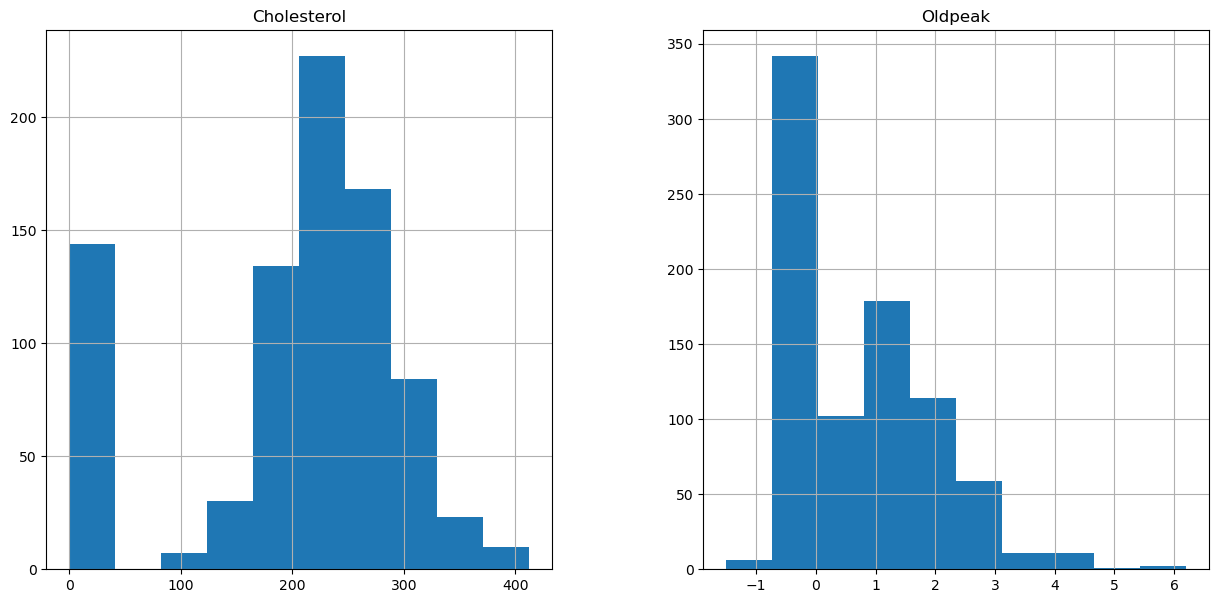

In [16]:
df[['Cholesterol', 'Oldpeak']].hist(figsize=(15,7))
# 콜레스테롤, Oldpeak 수치에 0의 비중이 꽤 많은 것을 알 수 있으며 이 0을 중앙값을 대체

In [17]:
df['Cholesterol'].value_counts() # 0에 매우 많은 분포를 보이기 때문에 평균값으로 대체 하여야 한다.

Cholesterol
0      144
254     11
220     10
223      9
211      9
      ... 
123      1
369      1
152      1
165      1
131      1
Name: count, Length: 208, dtype: int64

In [18]:
df['Oldpeak'].value_counts()

Oldpeak
 0.0    338
 1.0     77
 2.0     67
 1.5     46
 3.0     27
 1.2     24
 0.2     19
 1.4     16
 0.8     15
 1.8     15
 0.6     14
 2.5     13
 0.1     13
 1.6     13
 0.5     13
 0.3     11
 0.4     10
 4.0      8
 2.8      7
 1.1      7
 0.7      7
 2.6      7
 1.9      6
 1.3      5
 1.7      5
 3.6      4
 2.2      4
 0.9      4
 2.4      4
-0.5      2
 4.2      2
 2.3      2
 3.5      2
-0.1      2
 3.2      2
-1.0      2
 2.1      2
 3.4      2
 5.6      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-0.8      1
-1.1      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

In [19]:
df['Cholesterol'].describe().T

count    827.000000
mean     198.550181
std      102.529820
min        0.000000
25%      177.000000
50%      223.000000
75%      265.500000
max      412.000000
Name: Cholesterol, dtype: float64

In [20]:
zero_features = ['Cholesterol','Oldpeak']

total_count = df.shape[0]

for feature in zero_features:
    zero_count = df[df[feature] == 0][feature].count()
    print(f'{feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%') # 전처리 비중 

Cholesterol: 144건, 17.4123%
Oldpeak: 338건, 40.8706%


In [21]:
df[zero_features] = df[zero_features].replace(0, df[zero_features].mean()) # 중앙값으로 대체

In [22]:
df['Cholesterol'].value_counts()

Cholesterol
198.550181    144
254.000000     11
220.000000     10
223.000000      9
211.000000      9
             ... 
123.000000      1
369.000000      1
152.000000      1
165.000000      1
131.000000      1
Name: count, Length: 208, dtype: int64

In [23]:
df['Oldpeak'].value_counts()
df['Oldpeak'].describe().T

count    827.000000
mean       1.251994
std        0.827163
min       -1.500000
25%        0.888755
50%        0.888755
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

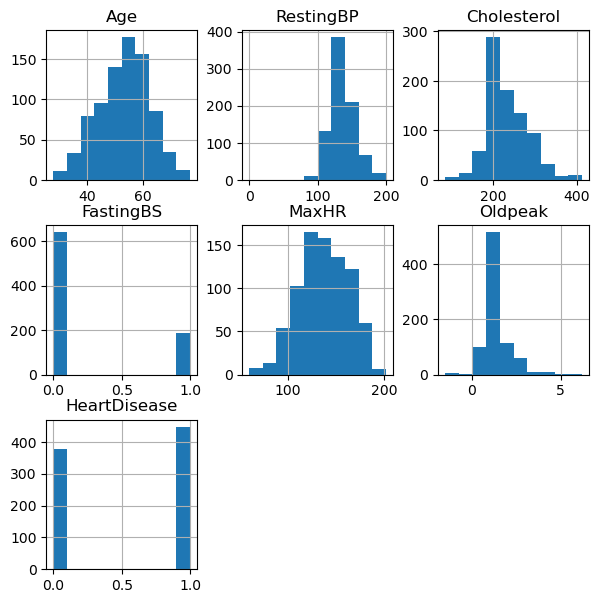

In [24]:
df.hist(figsize=(7,7))

In [25]:
pre_df = df.copy()

In [26]:
# 기존 문자열로 되어있는 범주형 데이터들을 수치형 데이터로 변경하기 위해 LabelEncoder() 사용 
from sklearn.preprocessing import LabelEncoder

columns = ['Sex','ChestPainType', 'ExerciseAngina', 'ST_Slope','RestingECG']

encoders = {}

for column in columns:
    encoder = LabelEncoder()
    pre_df[column] = encoder.fit_transform(pre_df[column].tolist())
    encoders[column] = encoder
    print(f'{column} : {encoder.classes_}')

Sex : ['F' 'M']
ChestPainType : ['ASY' 'ATA' 'NAP' 'TA']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Down' 'Flat' 'Up']
RestingECG : ['LVH' 'Normal' 'ST']


In [27]:
pre_df
# 모두 수치형으로 변경된 모습 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.888755,2,0
1,49,0,2,160,180.0,0,1,156,0,1.000000,1,1
2,37,1,1,130,283.0,0,2,98,0,0.888755,2,0
3,48,0,0,138,214.0,0,1,108,1,1.500000,1,1
4,54,1,2,150,195.0,0,1,122,0,0.888755,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
822,45,1,3,110,264.0,0,1,132,0,1.200000,1,1
823,68,1,0,144,193.0,1,1,141,0,3.400000,1,1
824,57,1,0,130,131.0,0,1,115,1,1.200000,1,1
825,57,0,1,130,236.0,0,0,174,0,0.888755,1,1


Text(0.5, 1.0, 'Heart Attack')

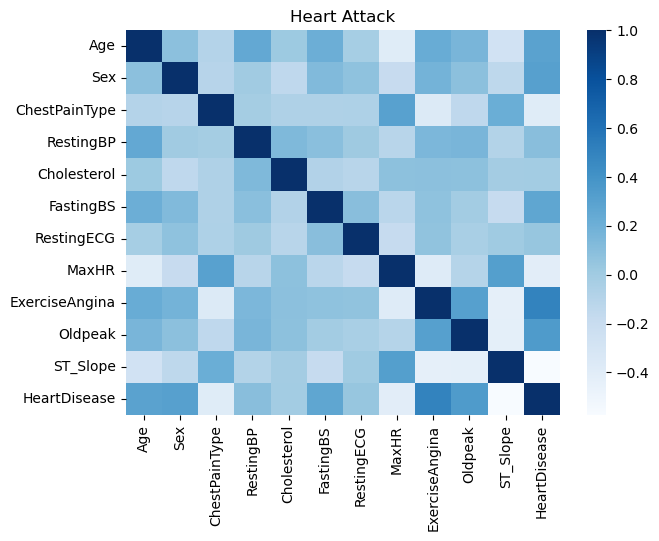

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pre_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Blues")
heatmap.set_title("Heart Attack")

In [29]:
# 타겟에 대한 피처들의 비중 분석
corr = pre_df.corr()
corr[['HeartDisease']].sort_values(by='HeartDisease', ascending=False)[1:]
# 독립 변수들과의 상관관계 분석 

,HeartDisease
ExerciseAngina,0.497661
Oldpeak,0.346064
Sex,0.306001
Age,0.294651
FastingBS,0.270921
RestingBP,0.096663
RestingECG,0.041454
Cholesterol,-0.006068
ChestPainType,-0.387838
MaxHR,-0.408250


<!-- #### 💡 FastingBs 같은 경우 타겟 데이터에 큰 비중이 없는 것을 확인 하였으므로 제거 !  -->

In [30]:
pre_df['Sex'].value_counts()

Sex
1    655
0    172
Name: count, dtype: int64

In [31]:
## 이상치&결측치&중복치 제거모두 완료 (일반화 작업 완료)
# 타겟 데이터에 대한 Feature 비중 순위 
# 1st ST_slope  2st ExerciseAngina, 3st olepeak
pre_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.888755,2,0
1,49,0,2,160,180.0,0,1,156,0,1.000000,1,1
2,37,1,1,130,283.0,0,2,98,0,0.888755,2,0
3,48,0,0,138,214.0,0,1,108,1,1.500000,1,1
4,54,1,2,150,195.0,0,1,122,0,0.888755,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
822,45,1,3,110,264.0,0,1,132,0,1.200000,1,1
823,68,1,0,144,193.0,1,1,141,0,3.400000,1,1
824,57,1,0,130,131.0,0,1,115,1,1.200000,1,1
825,57,0,1,130,236.0,0,0,174,0,0.888755,1,1


In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)
y_train.value_counts()
# 타겟 데이터 개수 출력 

HeartDisease
1    358
0    303
Name: count, dtype: int64

In [33]:
# SMOTE를 통해 낮은 비율의 타겟의 데이터 수를 늘렸다. (oversampling)
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
y_train_over.value_counts()

HeartDisease
1    358
0    358
Name: count, dtype: int64

In [34]:
# 교차검증 실시 GridSearchCV
# SVC (Support Vactor Machine)
# KNN (최근접 이웃 알고리즘)
# Ensemble (Bagging(Random Forest), Boosting(Adaboost))
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dtc_parameters = {'max_depth' : [5,6,7], 'min_samples_split': [15,16,17]}

svc_parameters = {'svc__C' : [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__kernel' : ['rbf'],
                 }
knn_parameters = {'knn__n_neighbors' : [3,5,7,9,11,55,65]}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True) 
knn = KNeighborsClassifier()


g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)


svc_pipe = Pipeline([('standard_scaler', StandardScaler()),('svc' , svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()),('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True)

In [35]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier

paramters = {
    'n_estimators' : [50, 100, 150],
    'learning_rate' : [0.3, 0.5, 0.7, 1]
}

rfc_parameters = {
    'max_depth' : [5,6,7],
    'min_samples_split' : [15,16,17]
}


gbc_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbc_parameters, cv=3)
g_gbc.fit(X_train_over, y_train_over)


g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=paramters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

rfc = RandomForestClassifier(n_estimators=100)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=5, n_jobs=-1)
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [15, 16, 17]})

In [36]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

x_parameters = {'n_estimators' : [50, 100, 500],
               'learning_rate' : [0.3, 0.5, 0.7, 1]}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=x_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)


evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

y_train_over.value_counts()

[0]	validation_0-logloss:0.37809	validation_1-logloss:0.33820
[1]	validation_0-logloss:0.27984	validation_1-logloss:0.23436
[2]	validation_0-logloss:0.23005	validation_1-logloss:0.16572
[3]	validation_0-logloss:0.19330	validation_1-logloss:0.14186
[4]	validation_0-logloss:0.16577	validation_1-logloss:0.11702
[5]	validation_0-logloss:0.14161	validation_1-logloss:0.10281
[6]	validation_0-logloss:0.12944	validation_1-logloss:0.08791
[7]	validation_0-logloss:0.11188	validation_1-logloss:0.07939
[8]	validation_0-logloss:0.09917	validation_1-logloss:0.07037
[9]	validation_0-logloss:0.08844	validation_1-logloss:0.06445
[10]	validation_0-logloss:0.07889	validation_1-logloss:0.05953
[11]	validation_0-logloss:0.07199	validation_1-logloss:0.05555
[12]	validation_0-logloss:0.06925	validation_1-logloss:0.05040
[13]	validation_0-logloss:0.06428	validation_1-logloss:0.04652
[14]	validation_0-logloss:0.06062	validation_1-logloss:0.04266
[15]	validation_0-logloss:0.05528	validation_1-logloss:0.03966
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


HeartDisease
1    358
0    358
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

lg_parameters = {'n_estimators' : [50, 100, 500],
                'learning_rate' : [0.3, 0.5, 0.7, 1]}
X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)



evals = [(X_val_train, y_val_train),(X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lg_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)


[LightGBM] [Info] Number of positive: 358, number of negative: 358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 716, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

### 💡 1 Cycle 분류모델 훈련

In [38]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [15, 16, 17]},
             return_train_score=True)

In [39]:
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(g_dtc.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ',g_dtc.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.8212
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 5, 'min_samples_split': 15}


In [40]:
print(g_dtc.best_params_, g_dtc.best_score_, sep='\n')
# max_depth -> 5, min_samples_split -> 17일때 최적의 파라미터 

{'max_depth': 5, 'min_samples_split': 15}
0.8211732711732711


In [41]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=15)
dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, min_samples_split=15)

In [42]:
dtc.feature_importances_

array([0.01607876, 0.10401962, 0.09703677, 0.03187547, 0.06802794,
       0.03200189, 0.        , 0.05078509, 0.05900948, 0.02760186,
       0.51356313])

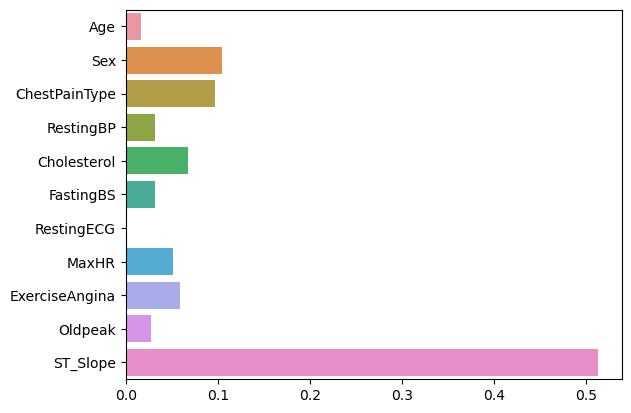

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

### 운동으로 인한 심박수 증가를 ST라고 합니다. 이 ST의 기울기를 해당 데이터세트에서는 ST_Slope으로 나타냈습니다.

<img src='./images/corr2.png' width='500px'>

#### Classifier 학습, 예측 수행

In [44]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['rbf']},
             return_train_score=True)

In [45]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 55, 65]},
             return_train_score=True)

In [46]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 15}",0.821173,1
1,"{'max_depth': 5, 'min_samples_split': 16}",0.818376,2
2,"{'max_depth': 5, 'min_samples_split': 17}",0.818376,2
3,"{'max_depth': 6, 'min_samples_split': 15}",0.810043,4
4,"{'max_depth': 6, 'min_samples_split': 16}",0.804448,6
5,"{'max_depth': 6, 'min_samples_split': 17}",0.804448,6
6,"{'max_depth': 7, 'min_samples_split': 15}",0.805847,5
7,"{'max_depth': 7, 'min_samples_split': 16}",0.804448,6
8,"{'max_depth': 7, 'min_samples_split': 17}",0.800262,9


In [47]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score','rank_test_score']]
print(svc_result_df['params'][5])
display(svc_result_df)
# 커널은 기본 rbf 형식이므로 linear로 했을 때와 비교하여 정확도를 구해보자 

{'svc__C': 0.001, 'svc__gamma': 100, 'svc__kernel': 'rbf'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.569425,20
1,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.569425,20
2,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.574981,18
3,"{'svc__C': 0.001, 'svc__gamma': 1, 'svc__kerne...",0.516647,28
4,"{'svc__C': 0.001, 'svc__gamma': 10, 'svc__kern...",0.498592,31
5,"{'svc__C': 0.001, 'svc__gamma': 100, 'svc__ker...",0.497203,34
6,"{'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...",0.569425,20
7,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.569425,20
8,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.689666,15
9,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.516647,28


In [48]:
g_svc.best_estimator_
# C=100, gamma= 0.01

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.001, probability=True))])

In [49]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.858916,4
1,{'knn__n_neighbors': 5},0.865919,1
2,{'knn__n_neighbors': 7},0.863112,2
3,{'knn__n_neighbors': 9},0.853341,5
4,{'knn__n_neighbors': 11},0.861723,3
5,{'knn__n_neighbors': 55},0.843561,6
6,{'knn__n_neighbors': 65},0.843541,7


In [50]:
g_knn.best_estimator_
# n_neibors -> 5일 때

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())])

### 심장질환 환자 예측 
#### 오차행렬

- 양성(Positive) > 1: 심장질환  환자를 의미.
- 음성(Negative) > 0: 정상 환자를 의미.


> True Positive (TP): 모델이 심장질환 환자를 올바르게 분류 한 경우
>  
> False Positive (FP): 모델이 정상 환자를 심장질환 환자로 잘못 분류한 경우(오진, error I)
>  
> True Negative (TN): 모델이 정상 환자를 정상으로 올바르게 분류한 경우 
> 
> False Negative (FN): 모델이 심장질환 환자를 정상으로 잘못 분류한 경우 (놓침, error II)  

> 정밀도 (Precision): 모델을 심장질환 환자로 예측하였을 때 정상적으로 실제 예측한 환자가 심장질환 환자인 경우의 비율
>
> 재현율 (Recall) :  실제 심장질환 환자 중에서 모델이 정확하게 심장질환 환자로 예측 하였는지의 비율
> 
> 🏆임계치를 낮춰서 재현율을 높여주는 것이 적합하다. (실제 심장질환 환자를 정상으로 잘못분류하지 않게끔 하기 위해)

#### 정확도 , Recall, F1 Score 점수 출력 

In [51]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

In [52]:
from sklearn.metrics import accuracy_score
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_prediction)
dtc_recall = recall_score(y_test, dtc_prediction )
dtc_f1 = f1_score(y_test, dtc_prediction)

print(f'정확도 : {dtc_score}')
print(f'재현율 : {dtc_recall}')
print(f'F1 Score : {dtc_f1}')

정확도 : 0.7831325301204819
재현율 : 0.8111111111111111
F1 Score : 0.8021978021978022


In [53]:
# 서포트 벡터 머신 (rbf 커널 사용 시)

svc_r = g_svc.best_estimator_
svc_r_prediction = svc_r.predict(X_test)
svc_r_score = accuracy_score(y_test, svc_r_prediction)
svc_r_recall = recall_score(y_test, svc_r_prediction)
svc_r_f1 = f1_score(y_test, svc_r_prediction)

print(f'정확도 : {svc_r_score}')
print(f'재현율 : {svc_r_recall}')
print(f'F1 Score : {svc_r_f1}')

정확도 : 0.8313253012048193
재현율 : 0.8222222222222222
F1 Score : 0.8409090909090908


In [54]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_prediction)
knn_recall = recall_score(y_test, knn_prediction)
knn_f1 = f1_score(y_test, knn_prediction)

print(f'정확도 : {knn_score}')
print(f'재현율 : {knn_recall}')
print(f'F1 Score : {knn_f1}')

정확도 : 0.8554216867469879
재현율 : 0.8444444444444444
F1 Score : 0.8636363636363636


In [55]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_recall = recall_score(y_test, rfc_prediction)
rfc_f1 = f1_score(y_test, rfc_prediction)

print(f'정확도 : {rfc_score}')
print(f'재현율 : {rfc_recall}')
print(f'F1 Score : {rfc_f1}')

정확도 : 0.8433734939759037
재현율 : 0.8555555555555555
F1 Score : 0.8555555555555555


In [56]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)
ada_score = accuracy_score(y_test, ada_prediction)
ada_recall = recall_score(y_test, ada_prediction)
ada_f1 = f1_score(y_test, ada_prediction)

print(f'정확도 : {ada_score}')
print(f'재현율 : {ada_recall}')
print(f'F1 Score : {ada_f1}')

정확도 : 0.8253012048192772
재현율 : 0.8111111111111111
F1 Score : 0.8342857142857144


In [57]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)
gbc_score = accuracy_score(y_test, gbc_prediction)
gbc_recall = recall_score(y_test, gbc_prediction)
gbc_f1 = f1_score(y_test, gbc_prediction)

print(f'정확도 : {gbc_score}')
print(f'재현율 : {gbc_recall}')
print(f'F1 Score : {gbc_f1}')

정확도 : 0.8192771084337349
재현율 : 0.8222222222222222
F1 Score : 0.8314606741573033


In [58]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_prediction)
xgb_recall = recall_score(y_test, xgb_prediction)
xgb_f1 = f1_score(y_test, xgb_prediction)

print(f'정확도 : {xgb_score}')
print(f'재현율 : {xgb_recall}')
print(f'F1 Score : {xgb_f1}')

정확도 : 0.8132530120481928
재현율 : 0.8
F1 Score : 0.822857142857143


In [59]:
lgbm = g_lgbm.best_estimator_
lg_prediction = lgbm.predict(X_test)
lg_score = accuracy_score(y_test, lg_prediction)
lg_recall = recall_score(y_test, lg_prediction)
lg_f1 = f1_score(y_test, lg_prediction)

print(f'정확도 : {ada_score}')
print(f'재현율 : {lg_recall}')
print(f'F1 Score : {lg_f1}')

정확도 : 0.8253012048192772
재현율 : 0.8444444444444444
F1 Score : 0.8636363636363636


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[57 19]
 [17 73]]
정확도: 0.7831, 정밀도: 0.7935, 재현율: 0.8111, F1: 0.8022, ROC_AUC: 0.7806
################################################################################


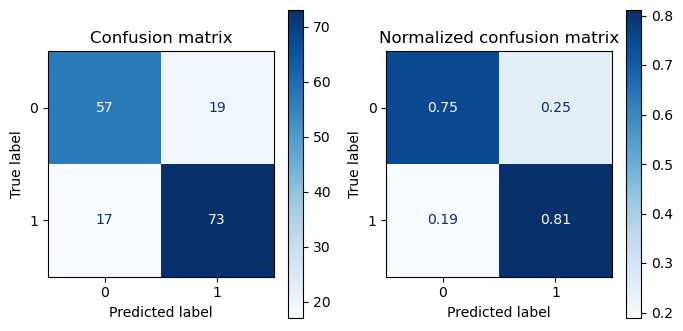

In [61]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)
# dtc -> 0.77

오차 행렬
[[64 12]
 [16 74]]
정확도: 0.8313, 정밀도: 0.8605, 재현율: 0.8222, F1: 0.8409, ROC_AUC: 0.8322
################################################################################


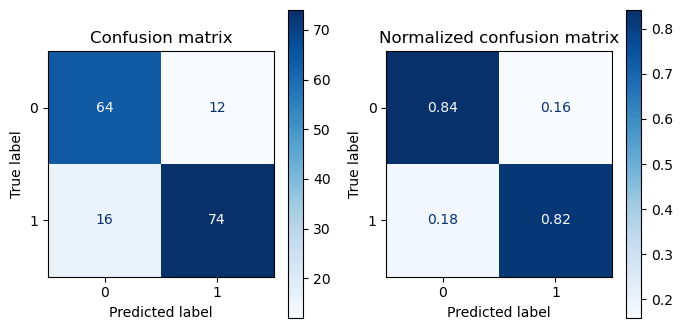

In [62]:
get_evaluation(y_test, svc_r_prediction, svc_r, X_test)
# svc_rbf : 81.93%

오차 행렬
[[66 10]
 [14 76]]
정확도: 0.8554, 정밀도: 0.8837, 재현율: 0.8444, F1: 0.8636, ROC_AUC: 0.8564
################################################################################


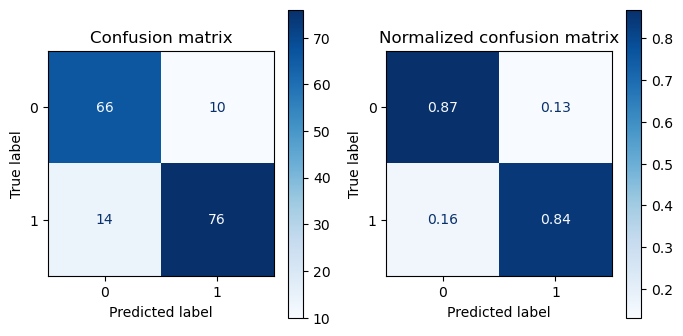

In [63]:
get_evaluation(y_test, knn_prediction, knn, X_test)
# knn -> 82.53%

오차 행렬
[[63 13]
 [13 77]]
정확도: 0.8434, 정밀도: 0.8556, 재현율: 0.8556, F1: 0.8556, ROC_AUC: 0.8423
################################################################################


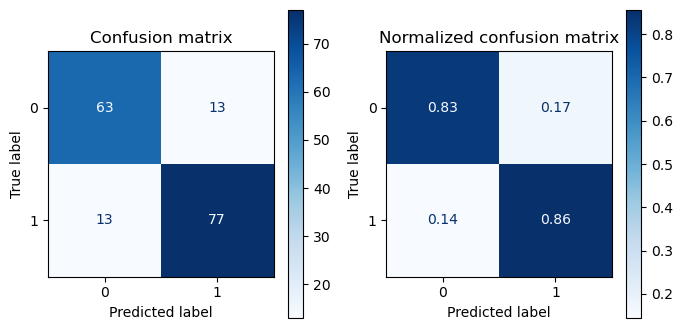

In [64]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)
# ✨ rfc 83.73 % 가장 정확도 높다!!!

오차 행렬
[[64 12]
 [17 73]]
정확도: 0.8253, 정밀도: 0.8588, 재현율: 0.8111, F1: 0.8343, ROC_AUC: 0.8266
################################################################################


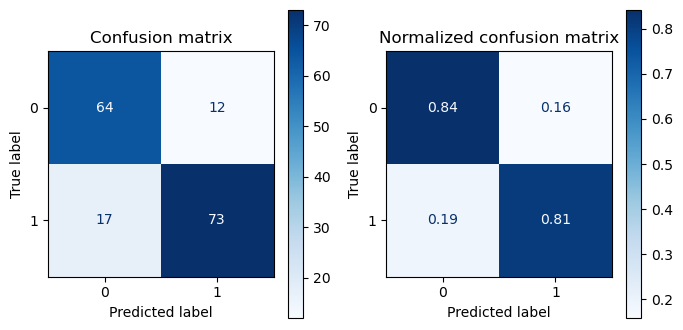

In [65]:
get_evaluation(y_test, ada_prediction, ada, X_test)
# adaboost 83.73%

오차 행렬
[[62 14]
 [16 74]]
정확도: 0.8193, 정밀도: 0.8409, 재현율: 0.8222, F1: 0.8315, ROC_AUC: 0.8190
################################################################################


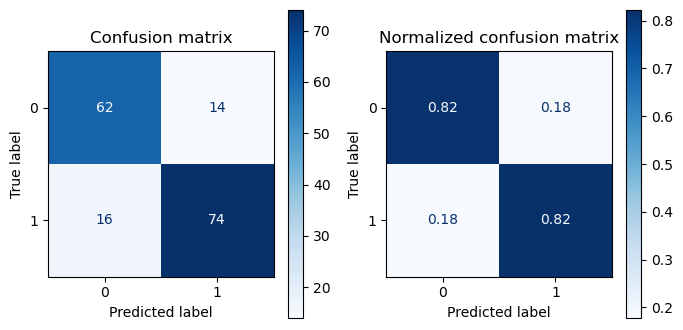

In [66]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)
# GBM 81.33%

오차 행렬
[[63 13]
 [18 72]]
정확도: 0.8133, 정밀도: 0.8471, 재현율: 0.8000, F1: 0.8229, ROC_AUC: 0.8145
################################################################################


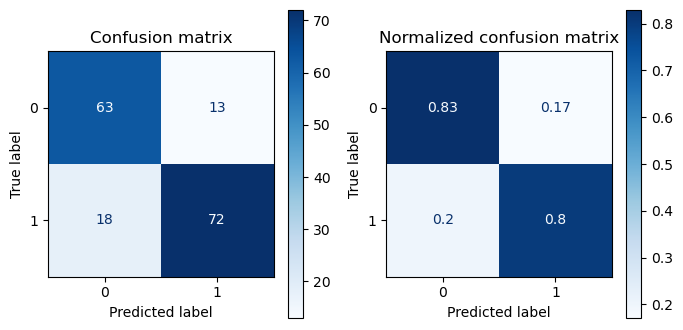

In [67]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)
# XGBoost 81.93%

오차 행렬
[[66 10]
 [14 76]]
정확도: 0.8554, 정밀도: 0.8837, 재현율: 0.8444, F1: 0.8636, ROC_AUC: 0.8564
################################################################################


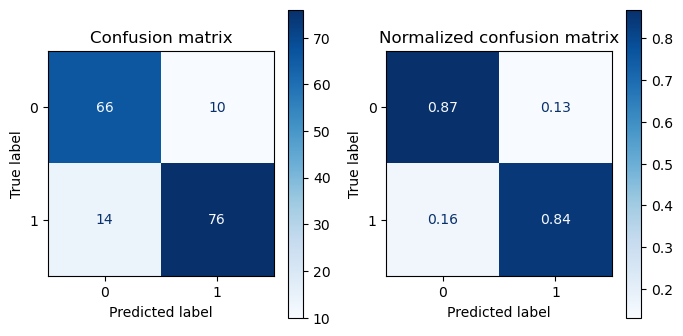

In [68]:
get_evaluation(y_test, lg_prediction, lgbm, X_test)
# LightGBM 82.53%

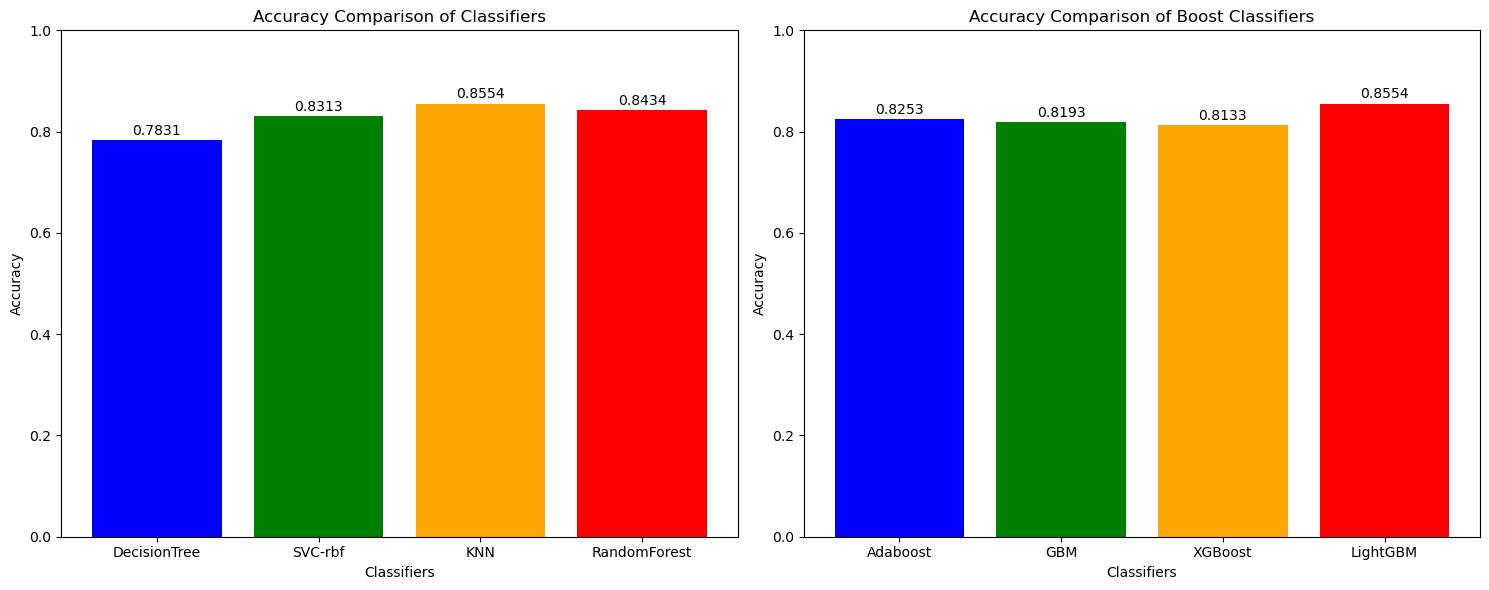

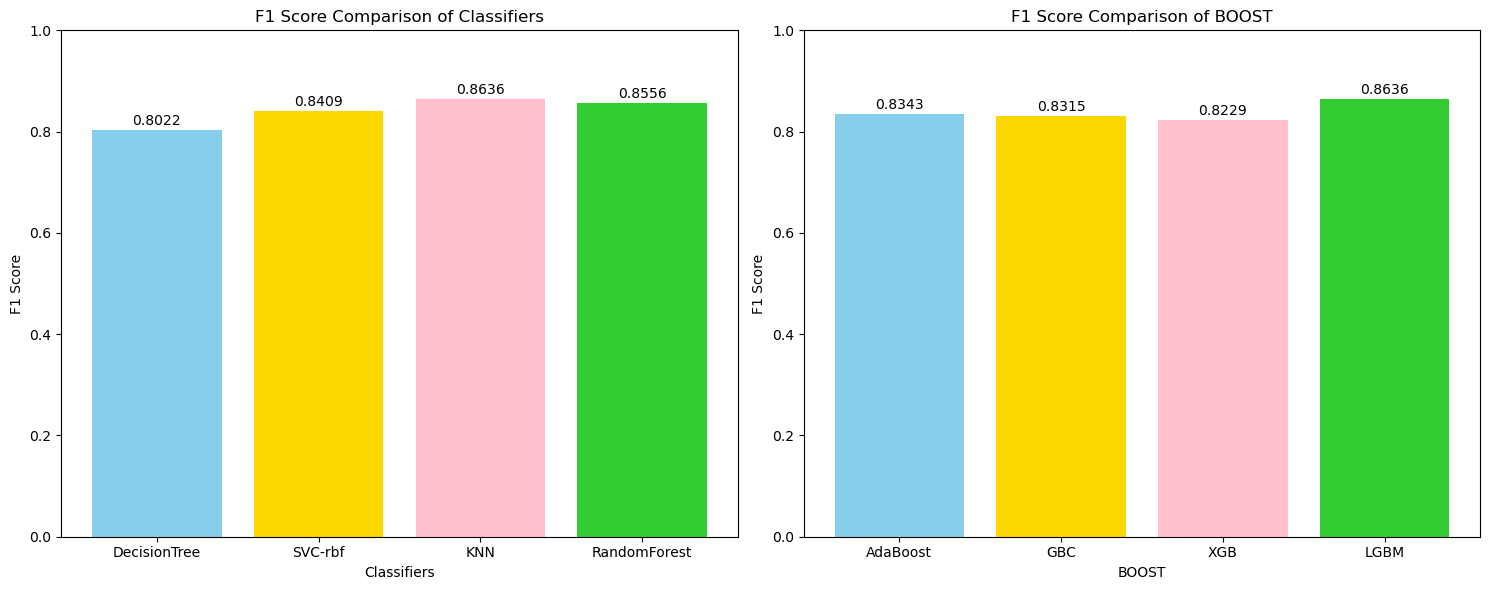

In [69]:
# 색상 리스트 정의
fig, axes = plt.subplots(1,2, figsize=(15, 6))
colors = ['blue', 'green', 'orange', 'red']

accuracies = [dtc_score,
              svc_r_score,
              knn_score,
              rfc_score,
             ]

classifiers = ['DecisionTree', 'SVC-rbf', 'KNN', 'RandomForest']
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
# 색상 리스트 정의
# colors = ['skyblue', 'limegreen', 'orange', 'pink']

accuracies = [ada_score,
              gbc_score,
              xgb_score,
              lg_score,
             ]

classifiers = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers, accuracies, color=colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.tight_layout()  
plt.show()


fig, axes = plt.subplots(1,2, figsize=(15, 6))
colors1 = ['skyblue', 'gold', 'pink', 'limegreen']

f1s = [dtc_f1,
       svc_r_f1,
       knn_f1,
       rfc_f1]

classifiers = ['DecisionTree', 'SVC-rbf', 'KNN', 'RandomForest']
for i, v in enumerate(f1s):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers, f1s, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('F1 Score')
    axes[0].set_title('F1 Score Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정
plt.tight_layout()

f1ss = [ada_f1,
        gbc_f1,
        xgb_f1,
        lg_f1,]

classifiers = ['AdaBoost', 'GBC', 'XGB', 'LGBM']
for i, v in enumerate(f1ss):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers, f1ss, color=colors1)
    axes[1].set_xlabel('BOOST')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of BOOST')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.tight_layout()    
plt.show() 



### ✨ 1 Cycle
- BOOST 기법을 제외한 차트에서는 DTC, SVC(rbf), KNN, Bagging(RandomForest)의 분류기법으로 정확도를 분석 해보았더니 KNN 방식이 가장 정확도가 86.36%로 가장 높았으며 더 정확한 분류를 위해 서포트벡터 머신에서 linear 커널과, Ensemble 분류기법에서는 Voting 방식을 사용해보도록 한다.
- BOOST 기법을 활용한 예측 정확도 차트에서는 LightGBM이 정확도가 85.54%로 가장 높게 나왔으며, 그 다음으로 AdaBoost가 82.53%으로 가장 높게 나왔다.
- 해당 데이터세트에서는 가장 정확도가 높은 KNN 방식과 LGBM을 사용하는것이 적합하다.

In [70]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(g_rfc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([10,  9,  8,  1,  5,  2,  3,  4,  6,  0,  7], dtype=int64)

In [71]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

ST_Slope: 0.1424
Oldpeak: 0.0363
ExerciseAngina: 0.0329
Sex: 0.0239
FastingBS: 0.0169
ChestPainType: 0.0094
RestingBP: 0.0026
Cholesterol: -0.0006
RestingECG: -0.0006
Age: -0.0046
MaxHR: -0.0056


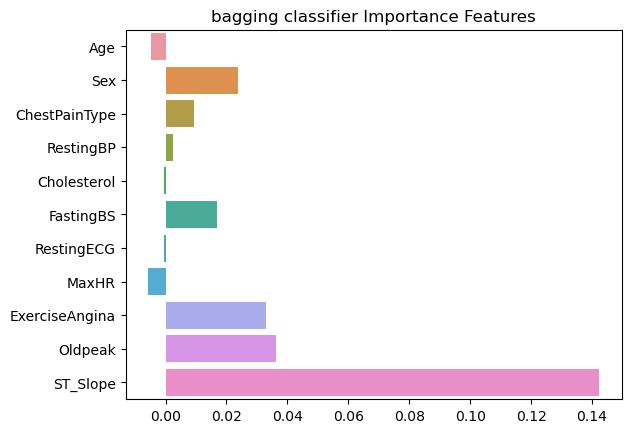

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.title("bagging classifier Importance Features")
plt.show()

#### ✨ 2 Cycle
> 가장 성능이 좋았던 분류기인 Bagging 모델의 경우 , 기존 correlation에서 가장 비중이 높았던 ST_slope이 여기서도 마찬가지로 가장 높았으며, 그 다음으로 운동 시 심전도 기울기인 Oldpeak이 가장 높았습니다.
>
> 다음 사이클에서는 SVC모델의 커널을 linear로 설정해서 해당 데이터가 선형 데이터인지, 비선형 데이터 인지 확인 해보겠습니다.

In [73]:
# 타겟에 대한 피처들의 비중 분석
corr = pre_df.corr()
corr[['HeartDisease']].sort_values(by='HeartDisease', ascending=False)[1:]
# 독립 변수들과의 상관관계 분석 

,HeartDisease
ExerciseAngina,0.497661
Oldpeak,0.346064
Sex,0.306001
Age,0.294651
FastingBS,0.270921
RestingBP,0.096663
RestingECG,0.041454
Cholesterol,-0.006068
ChestPainType,-0.387838
MaxHR,-0.408250


### 💡 3 Cycle
### SVC-linear 사용하여 예측

In [74]:
# SVC 파라미터 선언 (커널을 linear로 설정)
svc_parameters = {'svc__C': [0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['linear']
                 }

# SVC 클래스 설정 (커널을 linear로 설정)
svc = SVC(kernel='linear', probability=True)

# SVC 파이프라인 구축, 교차 검증 수행
svc_l_pipe = Pipeline([('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear']},
             return_train_score=True)

In [75]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__kernel': 'linear'}",0.844949,5
1,"{'svc__C': 0.1, 'svc__kernel': 'linear'}",0.856119,2
2,"{'svc__C': 1, 'svc__kernel': 'linear'}",0.857508,1
3,"{'svc__C': 10, 'svc__kernel': 'linear'}",0.856109,3
4,"{'svc__C': 100, 'svc__kernel': 'linear'}",0.856109,3


In [76]:
svc_l = g_svc.best_estimator_
svc_l_prediction = svc_l.predict(X_test)
svc_l_score = accuracy_score(y_test, svc_l_prediction)
svc_l_recall = recall_score(y_test, svc_l_prediction)
svc_l_f1 = f1_score(y_test, svc_l_prediction)

print('SVC(linear)')
print(f'정확도 : {svc_l_score}')
print(f'재현율 : {svc_l_recall}')
print(f'F1 Score : {svc_l_f1}')


SVC(linear)
정확도 : 0.8192771084337349
재현율 : 0.8111111111111111
F1 Score : 0.8295454545454545


오차 행렬
[[64 12]
 [16 74]]
정확도: 0.8313, 정밀도: 0.8605, 재현율: 0.8222, F1: 0.8409, ROC_AUC: 0.8322
################################################################################


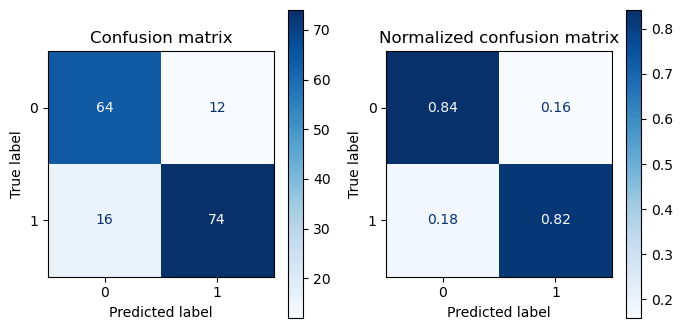

In [77]:
get_evaluation(y_test, svc_r_prediction, svc_r, X_test)

오차 행렬
[[63 13]
 [17 73]]
정확도: 0.8193, 정밀도: 0.8488, 재현율: 0.8111, F1: 0.8295, ROC_AUC: 0.8200
################################################################################


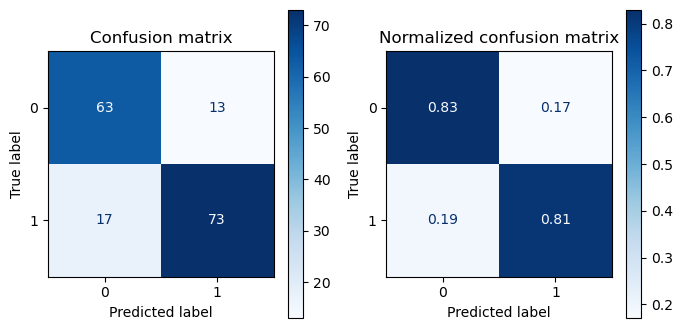

In [78]:
get_evaluation(y_test, svc_l_prediction,  svc_l, X_test)

### ✨ 2 Cycle
### SVC kernel (linear vs rbf)
> #### **linear kernel : 정확도(0.8193) , 재현율(0.8111) , F1 Score(0.8295)**
>


----  

  
> #### **rbf kernel : 정확도(0.8313), 재현율(0.8222), F1 Score(0.8409)**
>

>
>------------
> #### 💡 **rbf 커널 방식의 성능이 더 좋은 것을 볼 때 해당 데이터는 비선형 데이터에 가까운 것을 확인!**

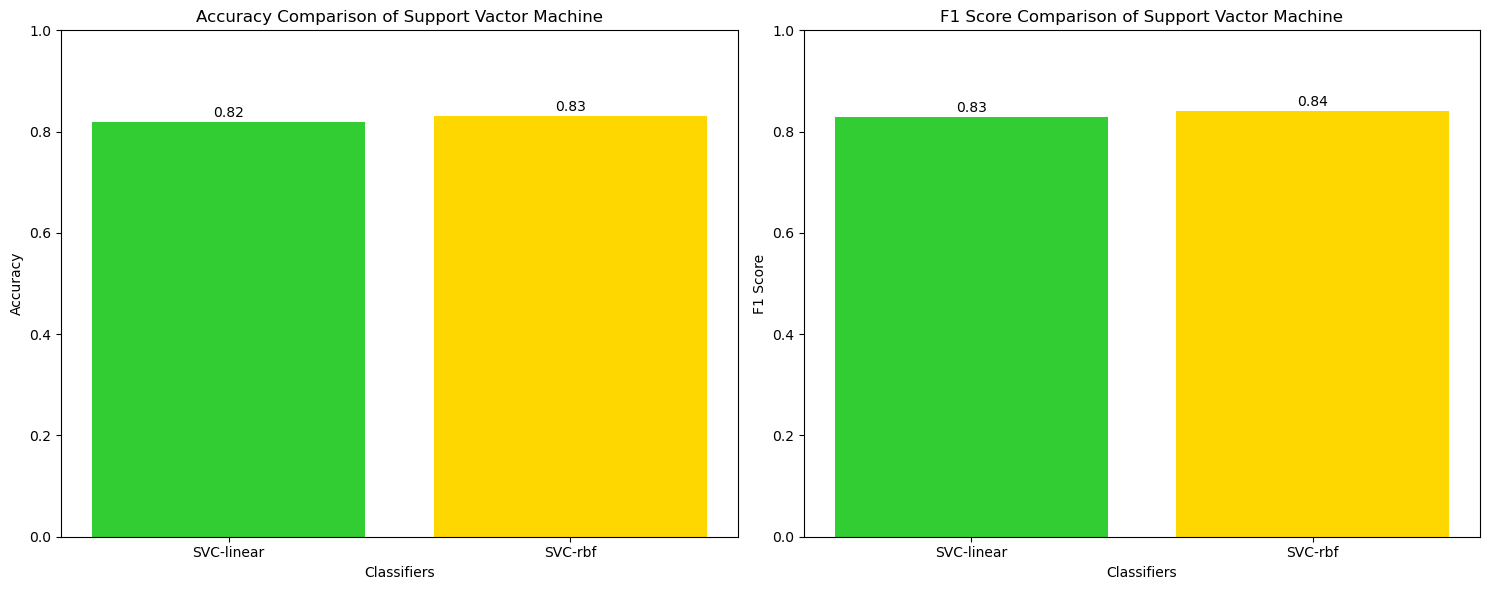

In [79]:
## linear 커널을 사용했을때가 rbf 커널을 사용했을 때보다 정확도가 더 높은 것을 확인 ! 
# 색상 리스트 정의
fig, axes = plt.subplots(1,2, figsize=(15, 6))
colors = ['limegreen', 'gold']


accuracies = [svc_l_score,
              svc_r_score,
             ]

classifiers = ['SVC-linear', 'SVC-rbf']
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Support Vactor Machine')
    axes[0].set_ylim(0, 1)  # y축 범위 설정
plt.tight_layout()

f1s = [svc_l_f1,
       svc_r_f1]

classifiers = ['SVC-linear', 'SVC-rbf']
for i, v in enumerate(f1s):
    axes[1].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[1].bar(classifiers, f1s, color=colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Support Vactor Machine')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.tight_layout()


plt.show() 

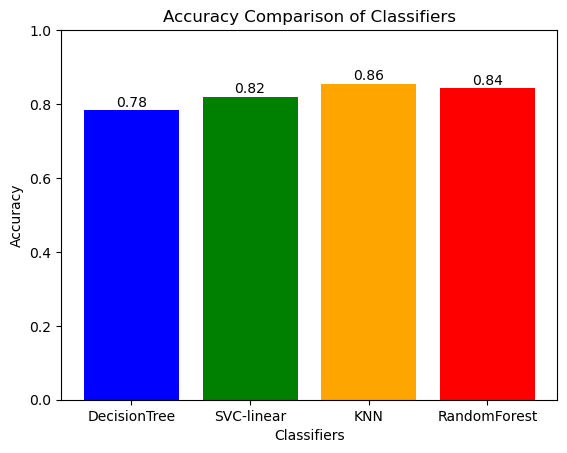

In [80]:
# 색상 리스트 정의
fig, 
colors = ['blue', 'green', 'orange', 'red']

accuracies = [dtc_score,
              svc_l_score,
              knn_score,
              rfc_score,
             ]

classifiers = ['DecisionTree', 'SVC-linear', 'KNN', 'RandomForest']
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    plt.bar(classifiers, accuracies, color=colors)
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Classifiers')
    plt.ylim(0, 1)  # y축 범위 설정
plt.show() 


### 💡 2 Cycle Result 
> #### **SVC에서 커널을 rbf로 설정하였을 때 더 좋은 성능을 보인 것을 알 수 있습니다.**
>
> #### 📌 이에 따라 해당 데이터는 비선형 데이터임을 알 수 있습니다.

### ✨ 3 Cycle
> #### Votting 분류 모델을 사용하여 예측

In [81]:
from sklearn.ensemble import VotingClassifier
# 정확도: 0.8012, 정밀도: 0.8059, 재현율: 0.8064, F1: 0.8012, ROC_AUC: 0.8064
vc = VotingClassifier(estimators=[('dtc', dtc),('svc',svc_pipe),('knn',knn_pipe), ('ada',ada)], voting='hard', n_jobs=-1)


# 정확도: 0.8193, 정밀도: 0.8179, 재현율: 0.8190, F1: 0.8183, ROC_AUC: 0.8190
vc_soft = VotingClassifier(estimators=[('dtc', dtc),('svc',svc_pipe),('knn',knn_pipe), ('ada',ada)], voting='soft', n_jobs=-1)

In [82]:
vc.fit(X_train_over, y_train_over)
# 하드 보팅

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=15)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier())])),
                             ('ada', AdaBoostClassifier(learning_rate=0.3))],
                 n_jobs=-1)

In [83]:
vc_soft.fit(X_train_over, y_train_over)
# 소프트 보팅 

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=15)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier())])),
                             ('ada', AdaBoostClassifier(learning_rate=0.3))],
                 n_jobs=-1, voting='soft')

In [84]:
vc_s_prediction = vc_soft.predict(X_test)
vc_s_score = accuracy_score(y_test, vc_s_prediction)
vc_s_recall = recall_score(y_test, vc_s_prediction)
vc_s_f1 = f1_score(y_test, vc_s_prediction)

print(f'정확도 : {vc_s_score}')
print(f'재현율 : {vc_s_recall}')
print(f'F1 Score : {vc_s_f1}')
# Votting - Soft

정확도 : 0.8493975903614458
재현율 : 0.8777777777777778
F1 Score : 0.8633879781420764


In [85]:
vc_prediction = vc.predict(X_test)
vc_score = accuracy_score(y_test, vc_prediction)
vc_recall = recall_score(y_test, vc_prediction)
vc_f1 = f1_score(y_test, vc_prediction)

print(f'정확도 : {vc_score}')
print(f'재현율 : {vc_recall}')
print(f'F1 Score : {vc_f1}')
# Votting - Hard 

정확도 : 0.8493975903614458
재현율 : 0.8444444444444444
F1 Score : 0.8587570621468928


오차 행렬
[[62 14]
 [11 79]]
정확도: 0.8494, 정밀도: 0.8495, 재현율: 0.8778, F1: 0.8634, ROC_AUC: 0.8468
################################################################################


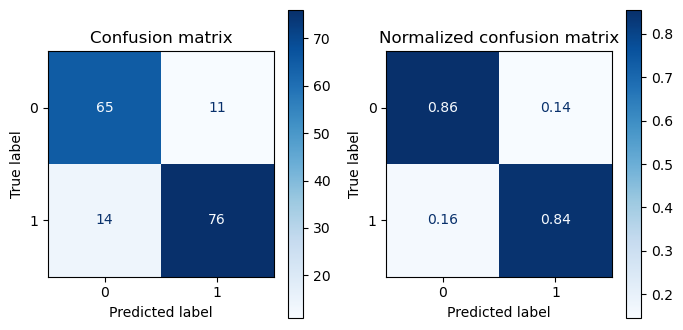

In [86]:
get_evaluation(y_test, vc_s_prediction, vc, X_test)

오차 행렬
[[65 11]
 [14 76]]
정확도: 0.8494, 정밀도: 0.8736, 재현율: 0.8444, F1: 0.8588, ROC_AUC: 0.8499
################################################################################


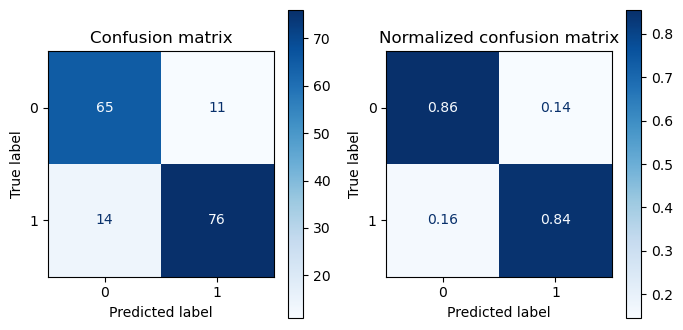

In [87]:
get_evaluation(y_test, vc_prediction, vc, X_test)

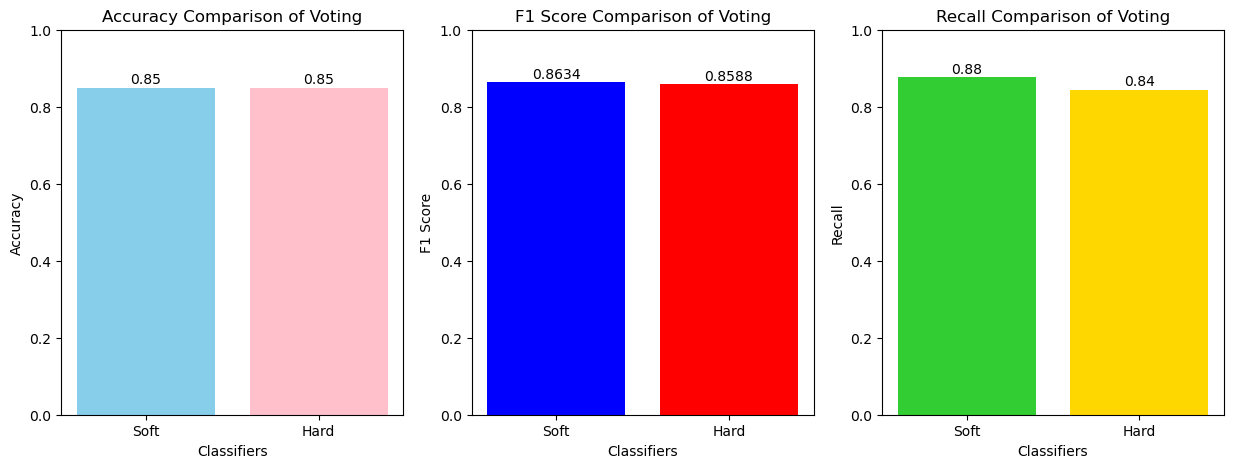

In [88]:
## 보팅의 Soft 방식이 Hard 방식보다 정확도는 동일하지만 F1 Score, 재현율이 더 높은 것을 확인!
# 색상 리스트 정의
fig, axes = plt.subplots(1,3, figsize=(15, 5))

colors = ['skyblue', 'pink']
f1_colors = ['blue', 'red', 'green']
r_colors = ['limegreen', 'gold' , 'slategray']

accuracies = [vc_s_score,
              vc_score,
             ]

f1s = [vc_s_f1, vc_f1]

recalls = [vc_s_recall, vc_recall]

classifiers = ['Soft', 'Hard']
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Voting')
    axes[0].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(f1s):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers, f1s, color=f1_colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Voting')
    axes[1].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(recalls):
    axes[2].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[2].bar(classifiers, recalls, color=r_colors)
    axes[2].set_xlabel('Classifiers')
    axes[2].set_ylabel('Recall')
    axes[2].set_title('Recall Comparison of Voting')
    axes[2].set_ylim(0, 1)  # y축 범위 설정
    
plt.show() 

### 💡 3 Cycle Result
#### Hard Votting vs Soft Votting
>
>
>
> **hard Votting 시 정확도가 85% 가 나온 것을 확인 할 수 있었으며 재현율 = 0.84, F1 Score = 0.8588이 나온 것을 확인 할 수 있었습니다 .**
>
>----- 
>
>

>
>
>
> **반면 soft Votting 시 정확도가 85%가 나온 것을 알 수 있으며, 재현율 과 F1 Score 모두 hard 보팅 방식보다 높은 것을 확인 할 수 있었습니다. 따라서 해당 데이터세트에서는 soft 방식이 더 적합한 것을 알 수 있습니다.**  


> 📌 만약 Votting으로 분류 작업을 할 것이라면, Soft 방식을 사용하는 것을 권장드립니다. 



### ✨ 4 Cycle
> #### **Bagging vs Voting**
> 앙상블 학습 기법에서 bagging 분류 기법과 voting 분류 모델과의 성능 차이를 비교하기로 하였습니다.

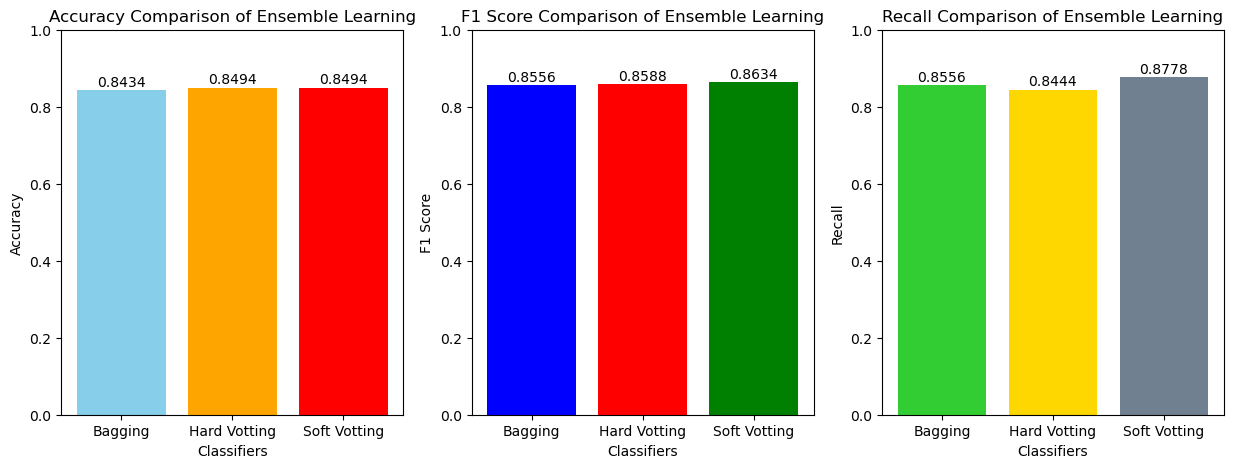

In [89]:
## Bagginhg 방식이 Votting 방식보다 더 정확도가 높은 것을 확인 
# 색상 리스트 정의

fig, axes = plt.subplots(1,3, figsize=(15, 5))

colors = ['skyblue', 'orange', 'red']

accuracies = [rfc_score,
              vc_score,
              vc_s_score]

recalls = [rfc_recall, vc_recall, vc_s_recall]
f1s = [rfc_f1, vc_f1, vc_s_f1]

classifiers = ['Bagging', 'Hard Votting', 'Soft Votting']
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Ensemble Learning')
    axes[0].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(f1s):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers, f1s, color=f1_colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Ensemble Learning')
    axes[1].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(recalls):
    axes[2].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[2].bar(classifiers, recalls, color=r_colors)
    axes[2].set_xlabel('Classifiers')
    axes[2].set_ylabel('Recall')
    axes[2].set_title('Recall Comparison of Ensemble Learning')
    axes[2].set_ylim(0, 1)  # y축 범위 설정
    
plt.show() 

### 💡 4 Cycle Result
#### 📌 앙상블 학습 기법으로는 배깅 방식의 RandomForest 알고리즘으로 분류 하였을 때,  
>
> #### 정확도의 경우 Voting 분류기법과 비슷 하였지만, F1 Score가 0.8603으로 0.8634인 Soft Voting보다 낮은 것을 확인.
>
>
> #### 재현율 같은 경우에도 SoftVoting 보다 점수가 낮은 것을 확인 하였습니다.

### ✨ 5 Cycle
- 전체 분류 모델들의 성능을 비교해보겠습니다.

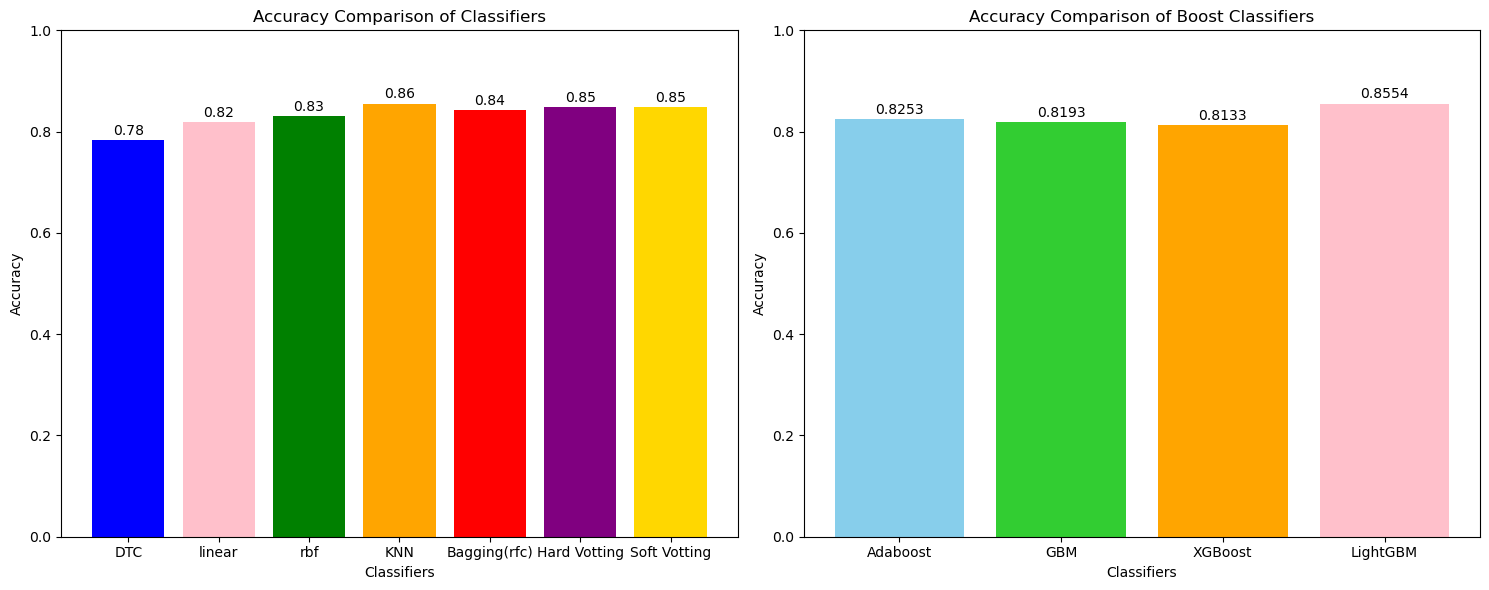

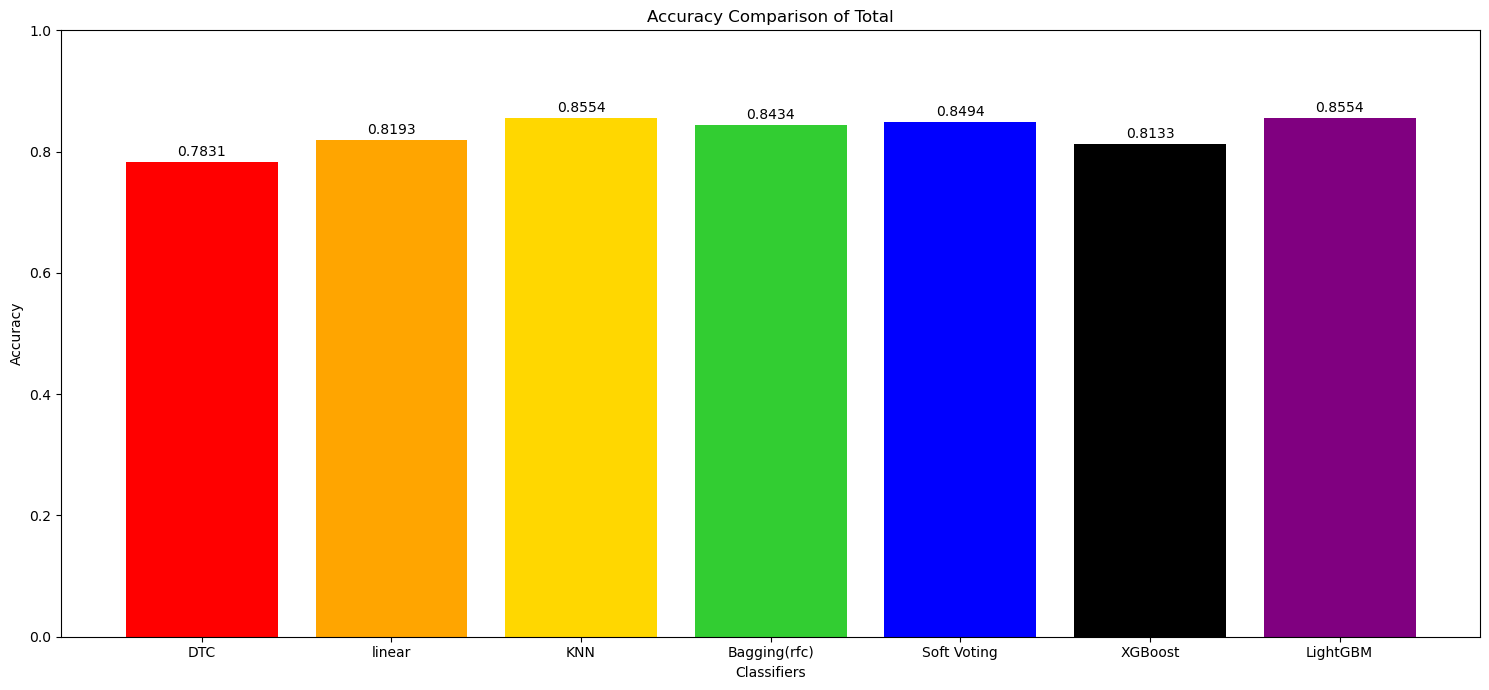

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 첫 번째 바 차트
colors1 = ['blue', 'pink','green', 'orange', 'red', 'purple', 'gold']
accuracies1 = [dtc_score, svc_l_score, svc_r_score, knn_score, rfc_score, vc_score, vc_s_score]
classifiers1 = ['DTC', 'linear' ,'rbf', 'KNN', 'Bagging(rfc)', 'Hard Votting' , 'Soft Votting']

for i, v in enumerate(accuracies1):
    axes[0].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[0].bar(classifiers1, accuracies1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정



# 두 번째 바 차트
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']
accuracies2 = [ada_score, gbc_score, xgb_score, lg_score]
classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, accuracies2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정

    
plt.tight_layout()
plt.show()

# 세 번째 바 차트
plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','black','purple', 'pink']
accuracies3 = [dtc_score, svc_l_score, knn_score, rfc_score, vc_s_score, xgb_score, lg_score]
classifiers3 = ['DTC', 'linear' ,'KNN', 'Bagging(rfc)', 'Soft Voting', 'XGBoost', 'LightGBM']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Total')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()

### 💡 각 분류기법 별 정확도 분석 
>  #### KNN 분류 모델의 정확도가 가장 높은 것을 확인 하였습니다.

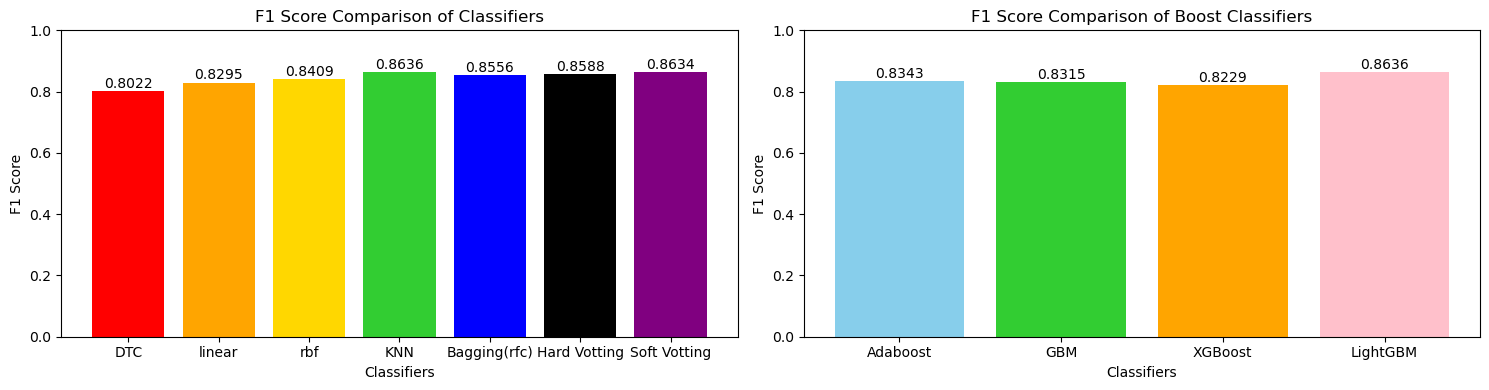

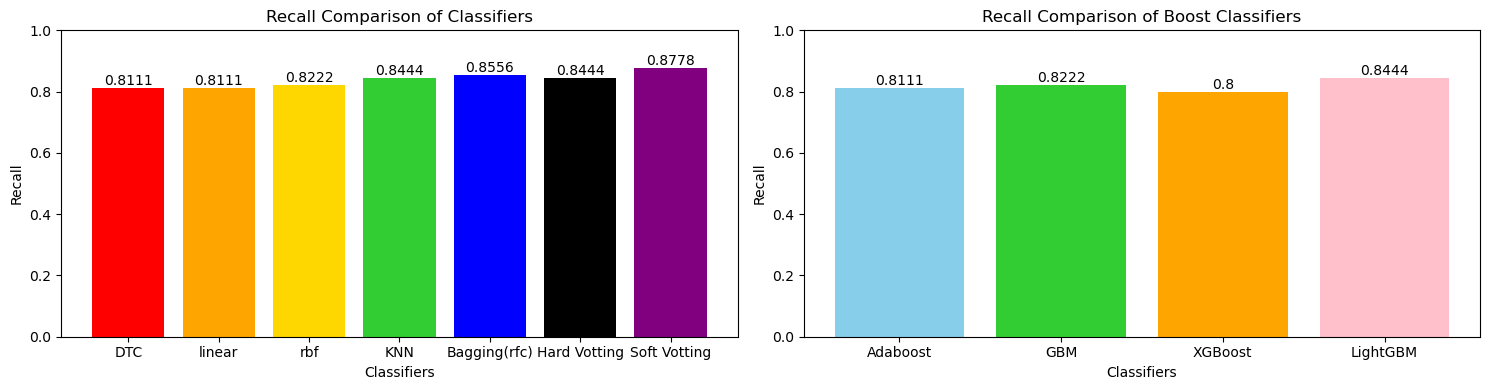

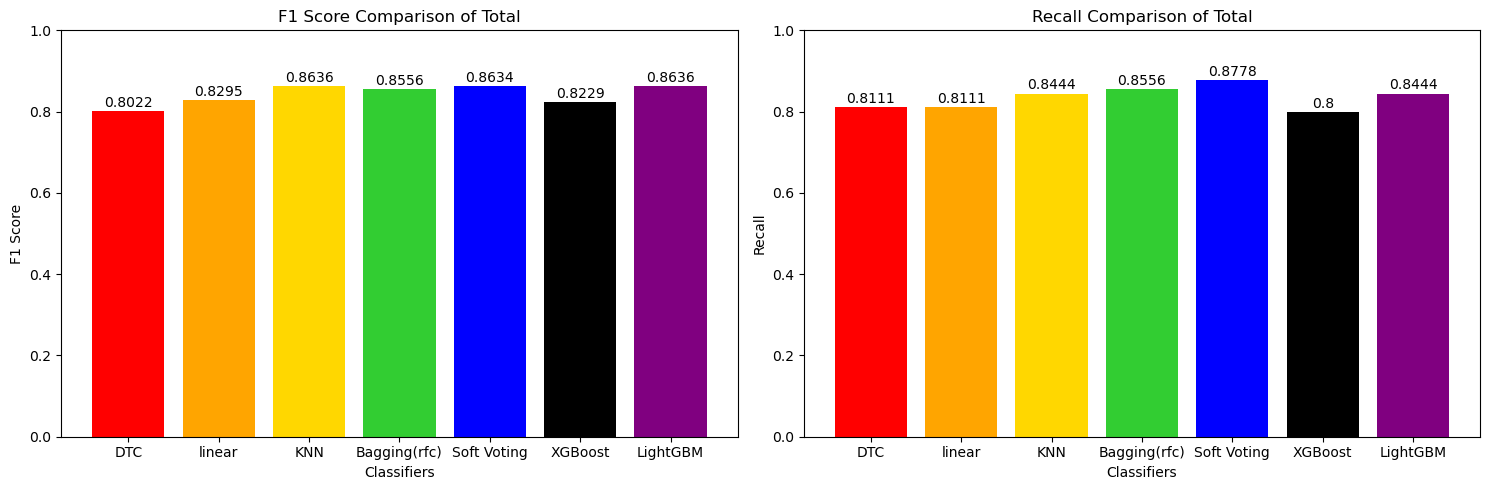

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 (F1 Score)
colors1 = ['red','orange','gold','limegreen','blue','black','purple', 'pink']
accuracies1 = [dtc_f1, svc_l_f1, svc_r_f1, knn_f1, rfc_f1, vc_f1, vc_s_f1]
classifiers1 = ['DTC', 'linear' ,'rbf', 'KNN', 'Bagging(rfc)', 'Hard Votting' , 'Soft Votting']

for i, v in enumerate(accuracies1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, accuracies1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('F1 Score')
    axes[0].set_title('F1 Score Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정



# 두 번째 바 차트 (F1 Score)
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']
accuracies2 = [ada_f1, gbc_f1, xgb_f1, lg_f1]
classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, accuracies2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
    
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 (Recall)
colors1 = ['red','orange','gold','limegreen','blue','black','purple', 'pink']
accuracies1 = [dtc_recall, svc_l_recall, svc_r_recall, knn_recall, rfc_recall, vc_recall, vc_s_recall]
classifiers1 = ['DTC', 'linear' ,'rbf', 'KNN', 'Bagging(rfc)', 'Hard Votting' , 'Soft Votting']

for i, v in enumerate(accuracies1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, accuracies1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Recall')
    axes[0].set_title('Recall Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정



# 두 번째 바 차트 (Recall)
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']
accuracies2 = [ada_recall, gbc_recall, xgb_recall, lg_recall]
classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, accuracies2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Recall')
    axes[1].set_title('Recall Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
    
plt.tight_layout()
plt.show()



# 세 번째 바 차트
fig, axes = plt.subplots(1,2, figsize=(15,5))

colors3 = ['red','orange','gold','limegreen','blue','black','purple', 'pink']
f13 = [dtc_f1, svc_l_f1, knn_f1, rfc_f1, vc_s_f1, xgb_f1, lg_f1]
recall3 = [dtc_recall, svc_l_recall, knn_recall, rfc_recall, vc_s_recall, xgb_recall, lg_recall]
classifiers3 = ['DTC', 'linear' ,'KNN', 'Bagging(rfc)', 'Soft Voting', 'XGBoost', 'LightGBM']

for i, v in enumerate(f13):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers3, f13, color=colors3)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('F1 Score')
    axes[0].set_title('F1 Score Comparison of Total')
    axes[0].set_ylim(0, 1)  # y축 범위 설정
plt.tight_layout()

for i, v in enumerate(recall3):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers3, recall3, color=colors3)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Recall')
    axes[1].set_title('Recall Comparison of Total')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()





### 💡 5 Cycle Result
>위 결과를 토대로 해당 데이터세트에서 SVC 분류기법을 사용할때는 rbf 커널을 사용하는 것을 권장하며, Voting 분류기와 Bagging 분류기 둘중에는 Voting분류기법 그 중에서도 soft voting 분류 기법을 사용하는것이 적합합니다. 또한 Boost 분류 기법을 사용할때는 LGBM을 사용하는 것을 권장합니다.
>
>최종적으로 해당 심장마비데이터세트에서 보다 높은 예측을 하려면 KNN 분류 모델을 사용하는 것 이 적합 합니다.
>
> 그 다음 KNN 분류 모델을 사용하였을 때의 Feature 별 중요도를 산출하여, 기존 분류 모델을 훈련하기 전 correlation 을 사용했을 때의 경우와 비교해보겠습니다.

### ✨ 6 Cycle
> KNN 분류모델의 Permutation importance 산출

In [92]:
from sklearn.inspection import permutation_importance
# KNN importance
importance = permutation_importance(g_knn, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([10,  8,  9,  1,  2,  5,  0,  4,  3,  7,  6], dtype=int64)

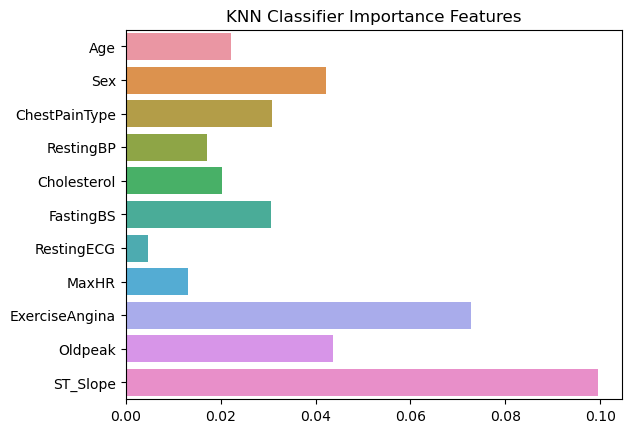

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.title("KNN Classifier Importance Features")
plt.show()

#### feature 별 중요도 산출 결과 ST_slope 이 가장 비중이 높았으며, 그 다음으로 Oldpeak, ExerciseAngina가 높은 것을 확인 하였습니다.

In [94]:
corr = pre_df.corr()
corr[['HeartDisease']].sort_values(by='HeartDisease', ascending=False)[1:]

,HeartDisease
ExerciseAngina,0.497661
Oldpeak,0.346064
Sex,0.306001
Age,0.294651
FastingBS,0.270921
RestingBP,0.096663
RestingECG,0.041454
Cholesterol,-0.006068
ChestPainType,-0.387838
MaxHR,-0.408250


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'ChestPainType'}>],
       [<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>],
       [<Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'ST_Slope'}>,
        <Axes: title={'center': 'HeartDisease'}>]], dtype=object)

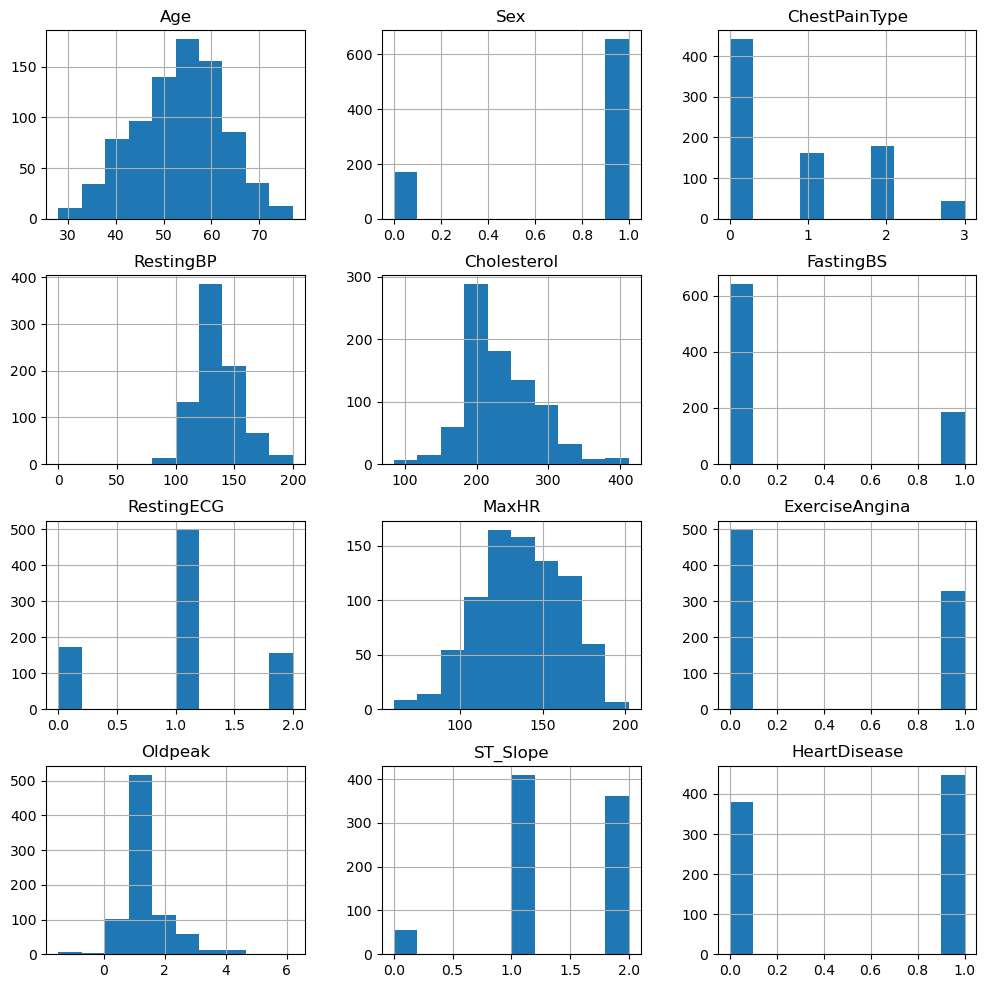

In [95]:
pre_df.hist(figsize=(12,12))

#### 해당 correlation 과 히스토그램을 활용하여 KNN의 importance와 비교해보았을 때 
#### 분포가 고르지 않으면서, 중요도 비중이 크지 않은 Feature들은 삭제하고, 가장 중요도 가 높은 ST_slope을 언더 샘플링 해야 합니다.

In [96]:
pre_df = pre_df.drop(labels=['Age' , 'ChestPainType' , 'RestingECG'], axis=1)

In [97]:
pre_df

,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,140,289.0,0,172,0,0.888755,2,0
1,0,160,180.0,0,156,0,1.000000,1,1
2,1,130,283.0,0,98,0,0.888755,2,0
3,0,138,214.0,0,108,1,1.500000,1,1
4,1,150,195.0,0,122,0,0.888755,2,0
...,...,...,...,...,...,...,...,...,...
822,1,110,264.0,0,132,0,1.200000,1,1
823,1,144,193.0,1,141,0,3.400000,1,1
824,1,130,131.0,0,115,1,1.200000,1,1
825,0,130,236.0,0,174,0,0.888755,1,1


In [98]:
pre_df['ST_Slope'].value_counts()

ST_Slope
1    410
2    362
0     55
Name: count, dtype: int64

In [99]:
pre_df = pre_df[pre_df['ST_Slope'] != 0]
pre_df['ST_Slope'].value_counts()


ST_Slope
1    410
2    362
Name: count, dtype: int64

#### ST_slope 언더 샘플링 

In [100]:
# # 언더 샘플링 시행


s2 = pre_df[pre_df['ST_Slope'] == 1].sample(362, random_state=124)
s3 = pre_df[pre_df['ST_Slope'] == 2]

pre_df = pd.concat([s2, s3]).reset_index(drop=True)

In [101]:
pre_df['ST_Slope'].value_counts()

ST_Slope
1    362
2    362
Name: count, dtype: int64

<Axes: >

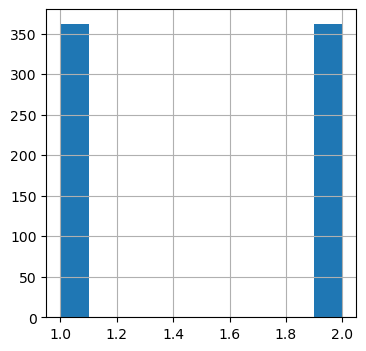

In [102]:
pre_df['ST_Slope'].hist(figsize=(4,4))

#### 해당 결과를 가지고 KNN 훈련 재개

In [104]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

features2, targets2 = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]

X1_train, X1_test, y1_train, y1_test =\
train_test_split(features2, targets2, stratify=targets2, test_size=0.2, random_state=124)
y1_train.value_counts()

smote = SMOTE(random_state=124)
X1_train_over, y1_train_over = smote.fit_resample(X1_train, y1_train)
y1_train_over.value_counts()

HeartDisease
1    292
0    292
Name: count, dtype: int64

In [105]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

knn_parameters = {'knn__n_neighbors' : [3,5,7,9,11,55,65]}
knn = KNeighborsClassifier()

knn_pipe = Pipeline([('standard_scaler',StandardScaler()),('knn', knn)])
g_knn2 = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True)

In [106]:
g_knn2.fit(X1_train_over, y1_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 55, 65]},
             return_train_score=True)

#### 📈 KNN 분류 기법으로 임계치 조절 

In [107]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = g_knn2.predict_proba(X1_test)
prediction = g_knn2.predict(X1_test)

In [108]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y1_test, custom_prediction)

오차 행렬
[[62 10]
 [10 63]]
정확도: 0.8621, 정밀도: 0.8630, 재현율: 0.8630, F1: 0.8630, ROC_AUC: 0.8621
################################################################################


In [109]:
thresholds = [0.15, 0.2, 0.24, 0.3, 0.4,0.47, 0.5,  0.56, 0.57, 0.58, 0.59, 0.6, 0.7]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y1_test, custom_prediction)

get_evaluation_by_thresholds(y1_test, proba[:, 1].reshape(-1, 1), thresholds)

0.15
오차 행렬
[[47 25]
 [ 4 69]]
정확도: 0.8000, 정밀도: 0.7340, 재현율: 0.9452, F1: 0.8263, ROC_AUC: 0.7990
################################################################################
0.2
오차 행렬
[[52 20]
 [ 4 69]]
정확도: 0.8345, 정밀도: 0.7753, 재현율: 0.9452, F1: 0.8519, ROC_AUC: 0.8337
################################################################################
0.24
오차 행렬
[[56 16]
 [ 4 69]]
정확도: 0.8621, 정밀도: 0.8118, 재현율: 0.9452, F1: 0.8734, ROC_AUC: 0.8615
################################################################################
0.3
오차 행렬
[[59 13]
 [ 5 68]]
정확도: 0.8759, 정밀도: 0.8395, 재현율: 0.9315, F1: 0.8831, ROC_AUC: 0.8755
################################################################################
0.4
오차 행렬
[[61 11]
 [ 8 65]]
정확도: 0.8690, 정밀도: 0.8553, 재현율: 0.8904, F1: 0.8725, ROC_AUC: 0.8688
################################################################################
0.47
오차 행렬
[[62 10]
 [10 63]]
정확도: 0.8621, 정밀도: 0.8630, 재현율: 0.8630, F1: 0.8630, ROC_AUC: 0.8621
################

#### 임계치(threshold)를 0.3으로 낮춰서 재현율을 높혀야 합니다.

In [127]:
from sklearn.preprocessing import Binarizer

threshold = 0.3

proba = g_knn2.predict_proba(X1_test)
prediction = g_knn2.predict(X1_test)

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y1_test, prediction)
#     정확도
    accuracy = accuracy_score(y1_test , prediction)
#     정밀도
    precision = precision_score(y1_test , prediction)
#     재현율
    recall = recall_score(y1_test , prediction)
#     F1 score
    f1 = f1_score(y1_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y1_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [132]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y1_test, custom_prediction)

오차 행렬
[[59 13]
 [ 5 68]]
정확도: 0.8759, 정밀도: 0.8395, 재현율: 0.9315, F1: 0.8831, ROC-AUC: 0.8755
################################################################################


#### 💡 임계치를 0.4로 낮춘 결과 정확도는 기존 0.8554에서 0.8759으로 내려갔지만  재현율은 기존 0.8444에서 0.9315로 높힐 수 있었고,   
#### F1 Score는 0.8 내의 범위를 유지하면서 
#### 얻고자 하는 최종 결과를 얻을 수 있었습니다.

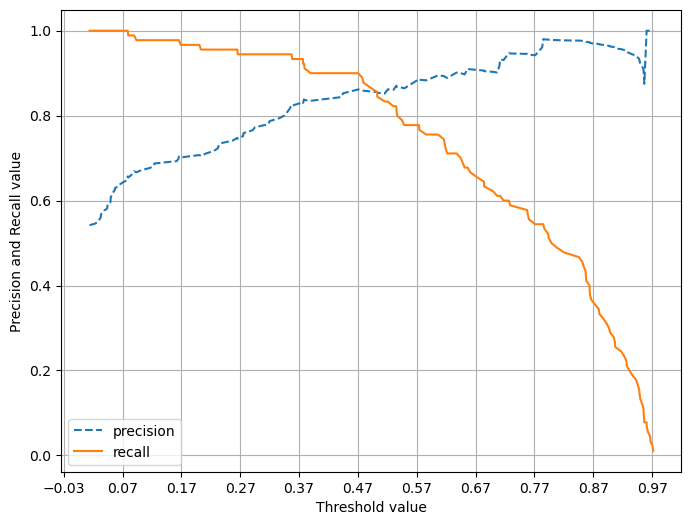

In [114]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, g_rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))



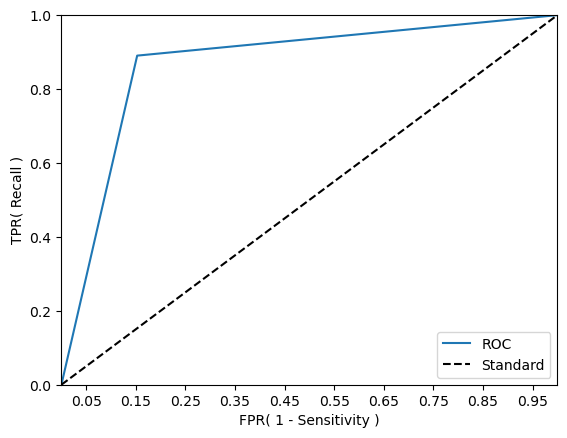

In [116]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y1_test, custom_prediction)

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

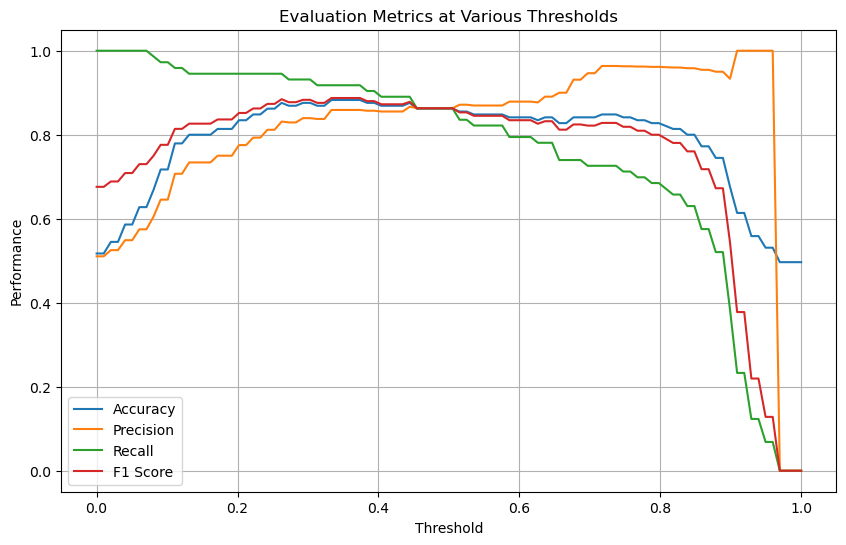

In [119]:
thresholds = np.linspace(0, 1, 100)
evaluations = []

for thresh in thresholds:
    binarizer = Binarizer(threshold=thresh)
    custom_prediction = binarizer.fit_transform(proba[:, 1].reshape(-1, 1))
    evaluations.append(get_evaluation(y1_test, custom_prediction))

evaluations = np.array(evaluations)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, evaluations[:, 0], label='Accuracy')
plt.plot(thresholds, evaluations[:, 1], label='Precision')
plt.plot(thresholds, evaluations[:, 2], label='Recall')
plt.plot(thresholds, evaluations[:, 3], label='F1 Score')
plt.title('Evaluation Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

prediction2 = g_knn2.predict(X1_test)
knn2_score = accuracy_score(y1_test, prediction2)
knn2_recall = recall_score(y1_test, prediction2)
knn2_f1 = f1_score(y1_test, prediction2)

print(f'일반화 작업 후 정확도 : {knn2_score}')
print(f'일반화 작업 후 재현율 : {knn2_recall}')
print(f'일반화 작업 후 F1 Score : {knn2_f1}')


일반화 작업 후 정확도 : 0.8620689655172413
일반화 작업 후 재현율 : 0.863013698630137
일반화 작업 후 F1 Score : 0.863013698630137


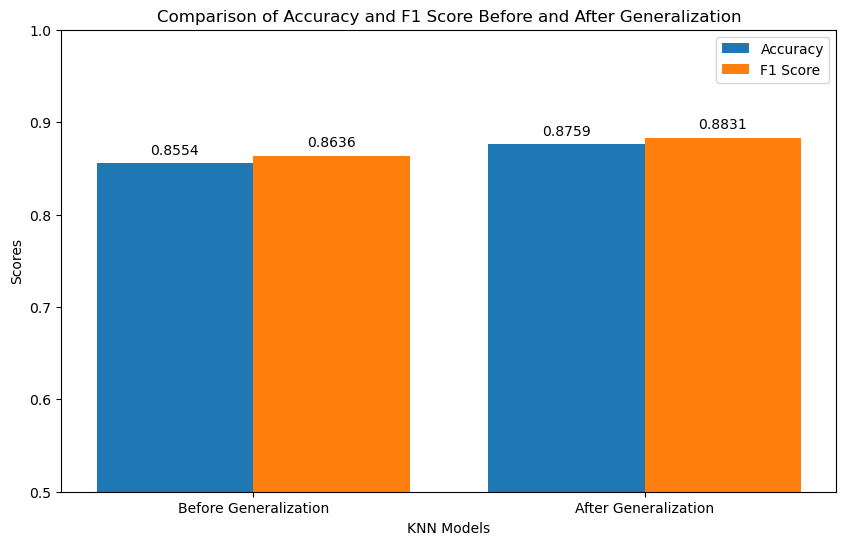

In [133]:
import matplotlib.pyplot as plt

# 정확도와 F1 Score
accuracy_scores = [knn_score, 0.8759]
f1_scores = [knn_f1, 0.8831]

# 그래프 생성
labels = ['Before Generalization', 'After Generalization']
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, accuracy_scores, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Score', align='center')  

# 그래프 라벨 및 제목 설정
plt.xlabel('KNN Models')
plt.ylabel('Scores')
plt.title('Comparison of Accuracy and F1 Score Before and After Generalization')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylim(0.5, 1)  # y축 범위 설정
plt.legend()

# 점수 표시
for i, value in enumerate(accuracy_scores):
    plt.text(i, value + 0.01, str(round(value, 4)), ha='center')

for i, value in enumerate(f1_scores):
    plt.text(i + 0.4, value + 0.01, str(round(value, 4)), ha='center')

plt.show()



### 💡 일반화 작업 및 feature 제거 후 KNN 분류 모델 점수 시각화
> 기존 corr()과 permuatation importance 부분에서 가장 중요도 비중이 높았던 ST_slope의 분포를 언더 샘플링으로 조절 작업
>
> 연관성이 없거나, 다른 독립변수들과의 상관관계는 높지만 중요도 비중은 낮은 Feature들을 삭제한 작업
>
> 이러한 작업들을 통해 다시 Fit을 하고 , 임계치(Threshold)를 0.3으로 낮춘 결과  정확도와 F1 Score 모두 높아져서 성능이 매우 발전된 것을 알 수 있습니다.

### 😊 최종 결론
- 해당 심장마비 예측 데이터세트에서 분류 작업 시에는 KNN분류 모델을 권장드립니다.
- 실제 중요도가 가장 높은 feature는 ST_slope이며, 그 다음으로 Oldpeak 임을 알 수 있었습니다.
- 그래서 해당 데이터에서 심장마비 환자를 예측하는데 가장 기준점이 되는 지표는 운동으로 인한 심박수 증가율이 높은 환자들을 우선적으로 검사를 해야합니다.